산탄데르 고객 만족 데이터 세트에 대해서 고객 만족 여부를 XGBoost와 LightGBM을 활용해 예측을 수행하고 시각화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./dataset/santander/train_santander.csv",encoding='latin-1')
print(cust_df.shape)
cust_df.head()

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
# 불만족 비율
print(cust_df['TARGET'].value_counts())
unsatisfied = cust_df[cust_df['TARGET']==1].TARGET.count()
total = cust_df.TARGET.count()
print(round(unsatisfied/total,4))

0    73012
1     3008
Name: TARGET, dtype: int64
0.0396


In [7]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

In [9]:
X = cust_df.iloc[:,:-1]
y = cust_df.iloc[:,-1]
print(X.shape)

(76020, 369)


In [10]:
# XGBoost 모델로 학습
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='auc',eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print(xgb_roc_score)

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

In [11]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7], 'min_child_weight':[1,3],'colsample_bytree':[0.5,0.75]}

gridcv = GridSearchCV(xgb_clf,param_grid = params, cv = 3)
gridcv.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='auc',eval_set=[(X_train,y_train),(X_test,y_test)])

print(gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print(xgb_roc_score)

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79161	validation_1-auc:0.79321
[1]	validation_0-auc:0.81865	validation_1-auc:0.81375
[2]	validation_0-auc:0.82586	validation_1-auc:0.81846
[3]	validation_0-auc:0.82789	validation_1-auc:0.82226
[4]	validation_0-auc:0.83249	validation_1-auc:0.82677
[5]	validation_0-auc:0.83477	validation_1-auc:0.83225
[6]	validation_0-auc:0.83340	validation_1-auc:0.82654
[7]	validation_0-auc:0.84223	validation_1-auc:0.83486
[8]	validation_0-auc:0.84586	validation_1-auc:0.83682
[9]	validation_0-auc:0.84557	validation_1-auc:0.83472
[10]	validation_0-auc:0.84423	validation_1-auc:0.83181
[11]	validation_0-auc:0.84428	validation_1-auc:0.82920
[12]	validation_0-auc:0.85176	validation_1-auc:0.83433
[13]	validation_0-auc:0.85540	validation_1-auc:0.83565
[14]	validation_0-auc:0.85718	validation_1-auc:0.83696
[15]	validation_0-auc:0.85851	validation_1-auc:0.83561
[16]	validation_0-auc:0.85964	validation_1-auc:0.83578
[17]	validation_0-auc:0.86091	validation_1-auc:0.83570
[18]	validation_0-au

[50]	validation_0-auc:0.87927	validation_1-auc:0.83690
[51]	validation_0-auc:0.87958	validation_1-auc:0.83671
[52]	validation_0-auc:0.88052	validation_1-auc:0.83675
[53]	validation_0-auc:0.88067	validation_1-auc:0.83695
[54]	validation_0-auc:0.88072	validation_1-auc:0.83681
[55]	validation_0-auc:0.88122	validation_1-auc:0.83677
[56]	validation_0-auc:0.88133	validation_1-auc:0.83686
[57]	validation_0-auc:0.88140	validation_1-auc:0.83673
[58]	validation_0-auc:0.88141	validation_1-auc:0.83675
[59]	validation_0-auc:0.88170	validation_1-auc:0.83703
[60]	validation_0-auc:0.88238	validation_1-auc:0.83664
[61]	validation_0-auc:0.88260	validation_1-auc:0.83645
[62]	validation_0-auc:0.88271	validation_1-auc:0.83659
[63]	validation_0-auc:0.88287	validation_1-auc:0.83594
[64]	validation_0-auc:0.88302	validation_1-auc:0.83602
[65]	validation_0-auc:0.88304	validation_1-auc:0.83587
[66]	validation_0-auc:0.88310	validation_1-auc:0.83599
[67]	validation_0-auc:0.88325	validation_1-auc:0.83627
[68]	valid

[99]	validation_0-auc:0.89294	validation_1-auc:0.83359
[0]	validation_0-auc:0.79210	validation_1-auc:0.79292
[1]	validation_0-auc:0.81759	validation_1-auc:0.81404
[2]	validation_0-auc:0.82567	validation_1-auc:0.81864
[3]	validation_0-auc:0.82819	validation_1-auc:0.82244
[4]	validation_0-auc:0.83233	validation_1-auc:0.82618
[5]	validation_0-auc:0.83480	validation_1-auc:0.83163
[6]	validation_0-auc:0.83342	validation_1-auc:0.82840
[7]	validation_0-auc:0.84265	validation_1-auc:0.83512
[8]	validation_0-auc:0.84614	validation_1-auc:0.83742
[9]	validation_0-auc:0.84573	validation_1-auc:0.83475
[10]	validation_0-auc:0.84426	validation_1-auc:0.83066
[11]	validation_0-auc:0.84358	validation_1-auc:0.82937
[12]	validation_0-auc:0.85089	validation_1-auc:0.83491
[13]	validation_0-auc:0.85457	validation_1-auc:0.83785
[14]	validation_0-auc:0.85645	validation_1-auc:0.83894
[15]	validation_0-auc:0.85744	validation_1-auc:0.83784
[16]	validation_0-auc:0.85870	validation_1-auc:0.83899
[17]	validation_0-au

[49]	validation_0-auc:0.87536	validation_1-auc:0.83803
[50]	validation_0-auc:0.87550	validation_1-auc:0.83806
[51]	validation_0-auc:0.87584	validation_1-auc:0.83824
[52]	validation_0-auc:0.87640	validation_1-auc:0.83798
[53]	validation_0-auc:0.87653	validation_1-auc:0.83795
[54]	validation_0-auc:0.87699	validation_1-auc:0.83746
[55]	validation_0-auc:0.87762	validation_1-auc:0.83769
[56]	validation_0-auc:0.87793	validation_1-auc:0.83783
[57]	validation_0-auc:0.87825	validation_1-auc:0.83760
[58]	validation_0-auc:0.87842	validation_1-auc:0.83758
[59]	validation_0-auc:0.87854	validation_1-auc:0.83742
[60]	validation_0-auc:0.87890	validation_1-auc:0.83679
[61]	validation_0-auc:0.87905	validation_1-auc:0.83664
[62]	validation_0-auc:0.87911	validation_1-auc:0.83622
[63]	validation_0-auc:0.87926	validation_1-auc:0.83596
[64]	validation_0-auc:0.87950	validation_1-auc:0.83478
[65]	validation_0-auc:0.88021	validation_1-auc:0.83402
[66]	validation_0-auc:0.88018	validation_1-auc:0.83427
[67]	valid

[99]	validation_0-auc:0.88810	validation_1-auc:0.83666
[0]	validation_0-auc:0.80843	validation_1-auc:0.80885
[1]	validation_0-auc:0.82920	validation_1-auc:0.82211
[2]	validation_0-auc:0.83320	validation_1-auc:0.82400
[3]	validation_0-auc:0.83625	validation_1-auc:0.82577
[4]	validation_0-auc:0.84188	validation_1-auc:0.82897
[5]	validation_0-auc:0.84455	validation_1-auc:0.83377
[6]	validation_0-auc:0.84503	validation_1-auc:0.82916
[7]	validation_0-auc:0.85319	validation_1-auc:0.83364
[8]	validation_0-auc:0.85976	validation_1-auc:0.83390
[9]	validation_0-auc:0.85952	validation_1-auc:0.82834
[10]	validation_0-auc:0.85919	validation_1-auc:0.82378
[11]	validation_0-auc:0.85956	validation_1-auc:0.82400
[12]	validation_0-auc:0.86574	validation_1-auc:0.82888
[13]	validation_0-auc:0.87027	validation_1-auc:0.83251
[14]	validation_0-auc:0.87240	validation_1-auc:0.83311
[15]	validation_0-auc:0.87365	validation_1-auc:0.83080
[16]	validation_0-auc:0.87567	validation_1-auc:0.83134
[17]	validation_0-au

[49]	validation_0-auc:0.90057	validation_1-auc:0.82770
[50]	validation_0-auc:0.90075	validation_1-auc:0.82765
[51]	validation_0-auc:0.90090	validation_1-auc:0.82793
[52]	validation_0-auc:0.90152	validation_1-auc:0.82779
[53]	validation_0-auc:0.90180	validation_1-auc:0.82773
[54]	validation_0-auc:0.90205	validation_1-auc:0.82771
[55]	validation_0-auc:0.90346	validation_1-auc:0.82789
[56]	validation_0-auc:0.90345	validation_1-auc:0.82794
[57]	validation_0-auc:0.90419	validation_1-auc:0.82790
[58]	validation_0-auc:0.90437	validation_1-auc:0.82754
[59]	validation_0-auc:0.90507	validation_1-auc:0.82704
[60]	validation_0-auc:0.90514	validation_1-auc:0.82694
[61]	validation_0-auc:0.90499	validation_1-auc:0.82670
[62]	validation_0-auc:0.90502	validation_1-auc:0.82652
[63]	validation_0-auc:0.90499	validation_1-auc:0.82644
[64]	validation_0-auc:0.90498	validation_1-auc:0.82646
[65]	validation_0-auc:0.90532	validation_1-auc:0.82597
[66]	validation_0-auc:0.90542	validation_1-auc:0.82602
[67]	valid

[99]	validation_0-auc:0.91273	validation_1-auc:0.81409
[0]	validation_0-auc:0.80901	validation_1-auc:0.80653
[1]	validation_0-auc:0.82713	validation_1-auc:0.82150
[2]	validation_0-auc:0.83227	validation_1-auc:0.82513
[3]	validation_0-auc:0.83319	validation_1-auc:0.82525
[4]	validation_0-auc:0.83786	validation_1-auc:0.82805
[5]	validation_0-auc:0.84104	validation_1-auc:0.82979
[6]	validation_0-auc:0.84432	validation_1-auc:0.82639
[7]	validation_0-auc:0.85301	validation_1-auc:0.83411
[8]	validation_0-auc:0.85882	validation_1-auc:0.83754
[9]	validation_0-auc:0.85838	validation_1-auc:0.83437
[10]	validation_0-auc:0.85606	validation_1-auc:0.83252
[11]	validation_0-auc:0.85677	validation_1-auc:0.83031
[12]	validation_0-auc:0.86256	validation_1-auc:0.83311
[13]	validation_0-auc:0.86712	validation_1-auc:0.83500
[14]	validation_0-auc:0.86926	validation_1-auc:0.83593
[15]	validation_0-auc:0.87031	validation_1-auc:0.83404
[16]	validation_0-auc:0.87119	validation_1-auc:0.83472
[17]	validation_0-au

[49]	validation_0-auc:0.89208	validation_1-auc:0.83757
[50]	validation_0-auc:0.89202	validation_1-auc:0.83748
[51]	validation_0-auc:0.89204	validation_1-auc:0.83727
[52]	validation_0-auc:0.89202	validation_1-auc:0.83738
[53]	validation_0-auc:0.89268	validation_1-auc:0.83692
[54]	validation_0-auc:0.89290	validation_1-auc:0.83659
[55]	validation_0-auc:0.89372	validation_1-auc:0.83619
[56]	validation_0-auc:0.89463	validation_1-auc:0.83636
[57]	validation_0-auc:0.89462	validation_1-auc:0.83626
[58]	validation_0-auc:0.89483	validation_1-auc:0.83597
[59]	validation_0-auc:0.89507	validation_1-auc:0.83601
[60]	validation_0-auc:0.89520	validation_1-auc:0.83598
[61]	validation_0-auc:0.89577	validation_1-auc:0.83528
[62]	validation_0-auc:0.89590	validation_1-auc:0.83512
[63]	validation_0-auc:0.89587	validation_1-auc:0.83495
[64]	validation_0-auc:0.89615	validation_1-auc:0.83504
[65]	validation_0-auc:0.89611	validation_1-auc:0.83487
[66]	validation_0-auc:0.89635	validation_1-auc:0.83477
[67]	valid

[99]	validation_0-auc:0.90130	validation_1-auc:0.82630
[0]	validation_0-auc:0.81007	validation_1-auc:0.80693
[1]	validation_0-auc:0.82137	validation_1-auc:0.81877
[2]	validation_0-auc:0.82976	validation_1-auc:0.82498
[3]	validation_0-auc:0.83120	validation_1-auc:0.82212
[4]	validation_0-auc:0.83382	validation_1-auc:0.82481
[5]	validation_0-auc:0.83696	validation_1-auc:0.82672
[6]	validation_0-auc:0.83976	validation_1-auc:0.83016
[7]	validation_0-auc:0.84177	validation_1-auc:0.83330
[8]	validation_0-auc:0.84585	validation_1-auc:0.83282
[9]	validation_0-auc:0.84984	validation_1-auc:0.83519
[10]	validation_0-auc:0.85146	validation_1-auc:0.83530
[11]	validation_0-auc:0.85113	validation_1-auc:0.83380
[12]	validation_0-auc:0.85502	validation_1-auc:0.83622
[13]	validation_0-auc:0.85797	validation_1-auc:0.83644
[14]	validation_0-auc:0.85990	validation_1-auc:0.83686
[15]	validation_0-auc:0.86114	validation_1-auc:0.83639
[16]	validation_0-auc:0.86158	validation_1-auc:0.83602
[17]	validation_0-au

[49]	validation_0-auc:0.87969	validation_1-auc:0.83833
[50]	validation_0-auc:0.87978	validation_1-auc:0.83849
[51]	validation_0-auc:0.87989	validation_1-auc:0.83863
[52]	validation_0-auc:0.88053	validation_1-auc:0.83839
[53]	validation_0-auc:0.88057	validation_1-auc:0.83808
[54]	validation_0-auc:0.88061	validation_1-auc:0.83840
[55]	validation_0-auc:0.88057	validation_1-auc:0.83850
[56]	validation_0-auc:0.88065	validation_1-auc:0.83881
[57]	validation_0-auc:0.88114	validation_1-auc:0.83896
[58]	validation_0-auc:0.88184	validation_1-auc:0.83901
[59]	validation_0-auc:0.88206	validation_1-auc:0.83902
[60]	validation_0-auc:0.88229	validation_1-auc:0.83892
[61]	validation_0-auc:0.88283	validation_1-auc:0.83860
[62]	validation_0-auc:0.88292	validation_1-auc:0.83851
[63]	validation_0-auc:0.88308	validation_1-auc:0.83811
[64]	validation_0-auc:0.88362	validation_1-auc:0.83787
[65]	validation_0-auc:0.88397	validation_1-auc:0.83813
[66]	validation_0-auc:0.88401	validation_1-auc:0.83813
[67]	valid

[99]	validation_0-auc:0.89463	validation_1-auc:0.83127
[0]	validation_0-auc:0.81105	validation_1-auc:0.80637
[1]	validation_0-auc:0.82008	validation_1-auc:0.81881
[2]	validation_0-auc:0.82922	validation_1-auc:0.82532
[3]	validation_0-auc:0.83159	validation_1-auc:0.82594
[4]	validation_0-auc:0.83378	validation_1-auc:0.82618
[5]	validation_0-auc:0.83671	validation_1-auc:0.82887
[6]	validation_0-auc:0.84111	validation_1-auc:0.83302
[7]	validation_0-auc:0.84227	validation_1-auc:0.83380
[8]	validation_0-auc:0.84422	validation_1-auc:0.83346
[9]	validation_0-auc:0.84742	validation_1-auc:0.83581
[10]	validation_0-auc:0.84984	validation_1-auc:0.83563
[11]	validation_0-auc:0.84933	validation_1-auc:0.83344
[12]	validation_0-auc:0.85285	validation_1-auc:0.83653
[13]	validation_0-auc:0.85494	validation_1-auc:0.83796
[14]	validation_0-auc:0.85653	validation_1-auc:0.83880
[15]	validation_0-auc:0.85803	validation_1-auc:0.83841
[16]	validation_0-auc:0.85922	validation_1-auc:0.83773
[17]	validation_0-au

[49]	validation_0-auc:0.87629	validation_1-auc:0.83900
[50]	validation_0-auc:0.87637	validation_1-auc:0.83902
[51]	validation_0-auc:0.87649	validation_1-auc:0.83930
[52]	validation_0-auc:0.87650	validation_1-auc:0.83930
[53]	validation_0-auc:0.87749	validation_1-auc:0.83867
[54]	validation_0-auc:0.87753	validation_1-auc:0.83860
[55]	validation_0-auc:0.87790	validation_1-auc:0.83816
[56]	validation_0-auc:0.87793	validation_1-auc:0.83825
[57]	validation_0-auc:0.87841	validation_1-auc:0.83757
[58]	validation_0-auc:0.87875	validation_1-auc:0.83739
[59]	validation_0-auc:0.87972	validation_1-auc:0.83660
[60]	validation_0-auc:0.87981	validation_1-auc:0.83621
[61]	validation_0-auc:0.88004	validation_1-auc:0.83627
[62]	validation_0-auc:0.88018	validation_1-auc:0.83606
[63]	validation_0-auc:0.88101	validation_1-auc:0.83510
[64]	validation_0-auc:0.88141	validation_1-auc:0.83492
[65]	validation_0-auc:0.88160	validation_1-auc:0.83534
[66]	validation_0-auc:0.88200	validation_1-auc:0.83470
[67]	valid

[99]	validation_0-auc:0.88927	validation_1-auc:0.83289
[0]	validation_0-auc:0.81685	validation_1-auc:0.81075
[1]	validation_0-auc:0.82791	validation_1-auc:0.82283
[2]	validation_0-auc:0.83537	validation_1-auc:0.82615
[3]	validation_0-auc:0.83996	validation_1-auc:0.82712
[4]	validation_0-auc:0.84558	validation_1-auc:0.82791
[5]	validation_0-auc:0.84781	validation_1-auc:0.82977
[6]	validation_0-auc:0.85151	validation_1-auc:0.83373
[7]	validation_0-auc:0.85510	validation_1-auc:0.83444
[8]	validation_0-auc:0.85998	validation_1-auc:0.83601
[9]	validation_0-auc:0.86238	validation_1-auc:0.83804
[10]	validation_0-auc:0.86435	validation_1-auc:0.83584
[11]	validation_0-auc:0.86583	validation_1-auc:0.83093
[12]	validation_0-auc:0.87079	validation_1-auc:0.83235
[13]	validation_0-auc:0.87454	validation_1-auc:0.83253
[14]	validation_0-auc:0.87642	validation_1-auc:0.83254
[15]	validation_0-auc:0.87856	validation_1-auc:0.83218
[16]	validation_0-auc:0.87973	validation_1-auc:0.83171
[17]	validation_0-au

[49]	validation_0-auc:0.90050	validation_1-auc:0.83511
[50]	validation_0-auc:0.90094	validation_1-auc:0.83489
[51]	validation_0-auc:0.90119	validation_1-auc:0.83485
[52]	validation_0-auc:0.90157	validation_1-auc:0.83487
[53]	validation_0-auc:0.90162	validation_1-auc:0.83483
[54]	validation_0-auc:0.90156	validation_1-auc:0.83515
[55]	validation_0-auc:0.90167	validation_1-auc:0.83511
[56]	validation_0-auc:0.90262	validation_1-auc:0.83506
[57]	validation_0-auc:0.90276	validation_1-auc:0.83488
[58]	validation_0-auc:0.90329	validation_1-auc:0.83442
[59]	validation_0-auc:0.90360	validation_1-auc:0.83413
[60]	validation_0-auc:0.90377	validation_1-auc:0.83426
[61]	validation_0-auc:0.90394	validation_1-auc:0.83402
[62]	validation_0-auc:0.90446	validation_1-auc:0.83353
[63]	validation_0-auc:0.90487	validation_1-auc:0.83347
[64]	validation_0-auc:0.90555	validation_1-auc:0.83401
[65]	validation_0-auc:0.90612	validation_1-auc:0.83334
[66]	validation_0-auc:0.90634	validation_1-auc:0.83342
[67]	valid

[99]	validation_0-auc:0.91129	validation_1-auc:0.82056
[0]	validation_0-auc:0.81664	validation_1-auc:0.81074
[1]	validation_0-auc:0.83122	validation_1-auc:0.82620
[2]	validation_0-auc:0.83368	validation_1-auc:0.82978
[3]	validation_0-auc:0.83631	validation_1-auc:0.82844
[4]	validation_0-auc:0.83978	validation_1-auc:0.82902
[5]	validation_0-auc:0.84479	validation_1-auc:0.83150
[6]	validation_0-auc:0.85038	validation_1-auc:0.83301
[7]	validation_0-auc:0.85463	validation_1-auc:0.83347
[8]	validation_0-auc:0.85806	validation_1-auc:0.83504
[9]	validation_0-auc:0.86217	validation_1-auc:0.83665
[10]	validation_0-auc:0.86465	validation_1-auc:0.83511
[11]	validation_0-auc:0.86428	validation_1-auc:0.83467
[12]	validation_0-auc:0.86830	validation_1-auc:0.83612
[13]	validation_0-auc:0.87024	validation_1-auc:0.83695
[14]	validation_0-auc:0.87207	validation_1-auc:0.83698
[15]	validation_0-auc:0.87350	validation_1-auc:0.83506
[16]	validation_0-auc:0.87493	validation_1-auc:0.83587
[17]	validation_0-au

[49]	validation_0-auc:0.89107	validation_1-auc:0.83663
[50]	validation_0-auc:0.89126	validation_1-auc:0.83663
[51]	validation_0-auc:0.89156	validation_1-auc:0.83666
[52]	validation_0-auc:0.89209	validation_1-auc:0.83575
[53]	validation_0-auc:0.89246	validation_1-auc:0.83542
[54]	validation_0-auc:0.89294	validation_1-auc:0.83515
[55]	validation_0-auc:0.89298	validation_1-auc:0.83503
[56]	validation_0-auc:0.89314	validation_1-auc:0.83505
[57]	validation_0-auc:0.89312	validation_1-auc:0.83510
[58]	validation_0-auc:0.89336	validation_1-auc:0.83496
[59]	validation_0-auc:0.89325	validation_1-auc:0.83483
[60]	validation_0-auc:0.89323	validation_1-auc:0.83478
[61]	validation_0-auc:0.89315	validation_1-auc:0.83453
[62]	validation_0-auc:0.89320	validation_1-auc:0.83447
[63]	validation_0-auc:0.89323	validation_1-auc:0.83452
[64]	validation_0-auc:0.89327	validation_1-auc:0.83448
[65]	validation_0-auc:0.89338	validation_1-auc:0.83450
[66]	validation_0-auc:0.89399	validation_1-auc:0.83430
[67]	valid

[99]	validation_0-auc:0.90345	validation_1-auc:0.82442
[0]	validation_0-auc:0.80839	validation_1-auc:0.80987
[1]	validation_0-auc:0.82568	validation_1-auc:0.82196
[2]	validation_0-auc:0.83339	validation_1-auc:0.82958
[3]	validation_0-auc:0.83698	validation_1-auc:0.83249
[4]	validation_0-auc:0.84250	validation_1-auc:0.83515
[5]	validation_0-auc:0.84330	validation_1-auc:0.83849
[6]	validation_0-auc:0.84276	validation_1-auc:0.83417
[7]	validation_0-auc:0.84840	validation_1-auc:0.83701
[8]	validation_0-auc:0.85092	validation_1-auc:0.83860
[9]	validation_0-auc:0.85093	validation_1-auc:0.83816
[10]	validation_0-auc:0.84973	validation_1-auc:0.83676
[11]	validation_0-auc:0.85002	validation_1-auc:0.83660
[12]	validation_0-auc:0.85677	validation_1-auc:0.84120
[13]	validation_0-auc:0.86055	validation_1-auc:0.84387
[14]	validation_0-auc:0.86262	validation_1-auc:0.84445
[15]	validation_0-auc:0.86474	validation_1-auc:0.84328
[16]	validation_0-auc:0.86581	validation_1-auc:0.84307
[17]	validation_0-au

In [12]:
xgb_clf = XGBClassifier(n_estimators=500, random_state=156, learning_rate=0.02,max_depth=5,min_child_weight=3, colsample_bytree=0.5,reg_alpha=0.03)

xgb_clf.fit(X_train,y_train, early_stopping_rounds=200, eval_metric='auc',eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print(xgb_roc_score)

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72742	validation_1-auc:0.73391
[1]	validation_0-auc:0.80715	validation_1-auc:0.81071
[2]	validation_0-auc:0.80624	validation_1-auc:0.80581
[3]	validation_0-auc:0.80964	validation_1-auc:0.80898
[4]	validation_0-auc:0.80673	validation_1-auc:0.80736
[5]	validation_0-auc:0.81446	validation_1-auc:0.81287
[6]	validation_0-auc:0.81886	validation_1-auc:0.81845
[7]	validation_0-auc:0.82326	validation_1-auc:0.82152
[8]	validation_0-auc:0.82781	validation_1-auc:0.82588
[9]	validation_0-auc:0.82420	validation_1-auc:0.82216
[10]	validation_0-auc:0.82748	validation_1-auc:0.82432
[11]	validation_0-auc:0.82418	validation_1-auc:0.82284
[12]	validation_0-auc:0.82709	validation_1-auc:0.82502
[13]	validation_0-auc:0.82475	validation_1-auc:0.82316
[14]	validation_0-auc:0.82757	validation_1-auc:0.82608
[15]	validation_0-auc:0.82537	validation_1-auc:0.82406
[16]	validation_0-auc:0.82752	validation_1-auc:0.82571
[17]	validation_0-auc:0.82567	validation_1-auc:0.82424
[18]	validation_0-au

[149]	validation_0-auc:0.85210	validation_1-auc:0.84037
[150]	validation_0-auc:0.85198	validation_1-auc:0.84042
[151]	validation_0-auc:0.85241	validation_1-auc:0.84053
[152]	validation_0-auc:0.85273	validation_1-auc:0.84066
[153]	validation_0-auc:0.85309	validation_1-auc:0.84080
[154]	validation_0-auc:0.85301	validation_1-auc:0.84083
[155]	validation_0-auc:0.85294	validation_1-auc:0.84065
[156]	validation_0-auc:0.85295	validation_1-auc:0.84057
[157]	validation_0-auc:0.85325	validation_1-auc:0.84085
[158]	validation_0-auc:0.85354	validation_1-auc:0.84108
[159]	validation_0-auc:0.85350	validation_1-auc:0.84102
[160]	validation_0-auc:0.85339	validation_1-auc:0.84076
[161]	validation_0-auc:0.85351	validation_1-auc:0.84071
[162]	validation_0-auc:0.85357	validation_1-auc:0.84071
[163]	validation_0-auc:0.85357	validation_1-auc:0.84060
[164]	validation_0-auc:0.85399	validation_1-auc:0.84070
[165]	validation_0-auc:0.85397	validation_1-auc:0.84059
[166]	validation_0-auc:0.85400	validation_1-auc:

[296]	validation_0-auc:0.87083	validation_1-auc:0.84592
[297]	validation_0-auc:0.87097	validation_1-auc:0.84586
[298]	validation_0-auc:0.87098	validation_1-auc:0.84585
[299]	validation_0-auc:0.87103	validation_1-auc:0.84590
[300]	validation_0-auc:0.87106	validation_1-auc:0.84586
[301]	validation_0-auc:0.87116	validation_1-auc:0.84589
[302]	validation_0-auc:0.87118	validation_1-auc:0.84589
[303]	validation_0-auc:0.87125	validation_1-auc:0.84590
[304]	validation_0-auc:0.87131	validation_1-auc:0.84587
[305]	validation_0-auc:0.87138	validation_1-auc:0.84587
[306]	validation_0-auc:0.87143	validation_1-auc:0.84583
[307]	validation_0-auc:0.87146	validation_1-auc:0.84579
[308]	validation_0-auc:0.87154	validation_1-auc:0.84579
[309]	validation_0-auc:0.87160	validation_1-auc:0.84580
[310]	validation_0-auc:0.87165	validation_1-auc:0.84576
[311]	validation_0-auc:0.87168	validation_1-auc:0.84574
[312]	validation_0-auc:0.87172	validation_1-auc:0.84575
[313]	validation_0-auc:0.87179	validation_1-auc:

[443]	validation_0-auc:0.87869	validation_1-auc:0.84519
[444]	validation_0-auc:0.87873	validation_1-auc:0.84518
[445]	validation_0-auc:0.87879	validation_1-auc:0.84518
[446]	validation_0-auc:0.87882	validation_1-auc:0.84520
[447]	validation_0-auc:0.87886	validation_1-auc:0.84518
[448]	validation_0-auc:0.87887	validation_1-auc:0.84518
[449]	validation_0-auc:0.87895	validation_1-auc:0.84516
[450]	validation_0-auc:0.87900	validation_1-auc:0.84513
[451]	validation_0-auc:0.87904	validation_1-auc:0.84513
[452]	validation_0-auc:0.87911	validation_1-auc:0.84514
[453]	validation_0-auc:0.87916	validation_1-auc:0.84515
[454]	validation_0-auc:0.87919	validation_1-auc:0.84508
[455]	validation_0-auc:0.87923	validation_1-auc:0.84505
[456]	validation_0-auc:0.87925	validation_1-auc:0.84506
[457]	validation_0-auc:0.87932	validation_1-auc:0.84504
[458]	validation_0-auc:0.87935	validation_1-auc:0.84505
[459]	validation_0-auc:0.87942	validation_1-auc:0.84503
[460]	validation_0-auc:0.87945	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

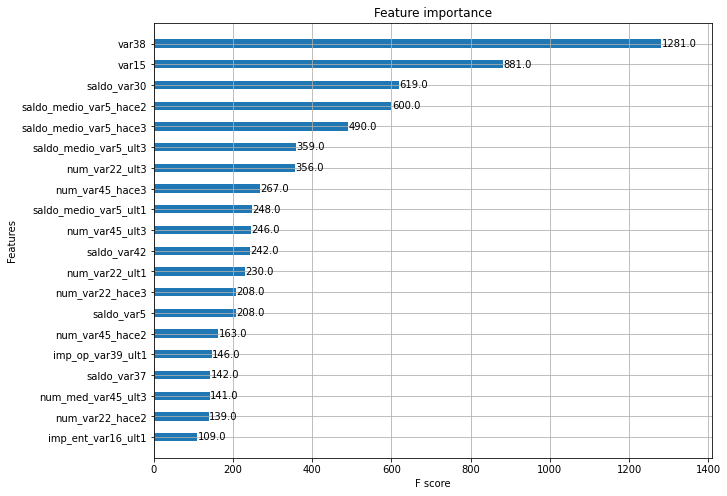

In [13]:
#피처 중요도 그래프
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax,max_num_features=20,height=0.4)

In [16]:
#LightGBM 모델로 학습
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train,y_train, early_stopping_rounds=200, eval_metric='auc',eval_set=evals,verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print(lgbm_roc_score)

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

[166]	valid_0's auc: 0.834396	valid_0's binary_logloss: 0.141848
[167]	valid_0's auc: 0.834196	valid_0's binary_logloss: 0.141917
[168]	valid_0's auc: 0.834167	valid_0's binary_logloss: 0.141926
[169]	valid_0's auc: 0.833961	valid_0's binary_logloss: 0.141982
[170]	valid_0's auc: 0.834021	valid_0's binary_logloss: 0.141993
[171]	valid_0's auc: 0.834074	valid_0's binary_logloss: 0.141971
[172]	valid_0's auc: 0.833976	valid_0's binary_logloss: 0.141994
[173]	valid_0's auc: 0.833946	valid_0's binary_logloss: 0.142021
[174]	valid_0's auc: 0.833781	valid_0's binary_logloss: 0.142034
[175]	valid_0's auc: 0.833777	valid_0's binary_logloss: 0.142048
[176]	valid_0's auc: 0.83372	valid_0's binary_logloss: 0.142048
[177]	valid_0's auc: 0.833537	valid_0's binary_logloss: 0.142123
[178]	valid_0's auc: 0.833532	valid_0's binary_logloss: 0.142135
[179]	valid_0's auc: 0.833461	valid_0's binary_logloss: 0.142201
[180]	valid_0's auc: 0.833492	valid_0's binary_logloss: 0.142205
[181]	valid_0's auc: 0.833

In [18]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64], 'max_depth':[128,160],'min_child_samples':[60,100],'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf,param_grid = params, cv = 3)
gridcv.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='auc',eval_set=[(X_train,y_train),(X_test,y_test)])

print(gridcv.best_params_)

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print(lgbm_roc_score)

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[75]	valid_0's auc: 0.892335	valid_0's binary_logloss: 0.116396	valid_1's auc: 0.828496	valid_1's binary_logloss: 0.142
[76]	valid_0's auc: 0.892413	valid_0's binary_logloss: 0.116309	valid_1's auc: 0.828479	valid_1's binary_logloss: 0.142037
[77]	valid_0's auc: 0.892724	valid_0's binary_logloss: 0.116193	valid_1's auc: 0.828775	valid_1's binary_logloss: 0.141984
[78]	valid_0's auc: 0.893152	valid_0's binary_logloss: 0.116087	valid_1's auc: 0.828763	valid_1's binary_logloss: 0.142013
[79]	valid_0's auc: 0.893164	valid_0's binary_logloss: 0.116022	valid_1's auc: 0.828658	valid_1's binary_logloss: 0.142056
[80]	valid_0's auc: 0.893358	valid_0's binary_logloss: 0.115878	valid_1's auc: 0.828923	valid_1's binary_logloss: 0.142009
[81]	valid_0's auc: 0.89346	valid_0's binary_logloss: 0.115789	valid_1's auc: 0.828949	valid_1's binary_logloss: 0.142048
[82]	valid_0's auc: 0.893828	valid_0's binary_logloss: 0.115606	valid_1's auc: 0.829065	valid_1's binary_logloss: 0.142024
[83]	valid_0's auc: 

[46]	valid_0's auc: 0.884409	valid_0's binary_logloss: 0.120295	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.139244
[47]	valid_0's auc: 0.884896	valid_0's binary_logloss: 0.120128	valid_1's auc: 0.838799	valid_1's binary_logloss: 0.139259
[48]	valid_0's auc: 0.885352	valid_0's binary_logloss: 0.119949	valid_1's auc: 0.838778	valid_1's binary_logloss: 0.139269
[49]	valid_0's auc: 0.885612	valid_0's binary_logloss: 0.119793	valid_1's auc: 0.838502	valid_1's binary_logloss: 0.139334
[50]	valid_0's auc: 0.886044	valid_0's binary_logloss: 0.119663	valid_1's auc: 0.838355	valid_1's binary_logloss: 0.139353
[51]	valid_0's auc: 0.886572	valid_0's binary_logloss: 0.119464	valid_1's auc: 0.838258	valid_1's binary_logloss: 0.13939
[52]	valid_0's auc: 0.886961	valid_0's binary_logloss: 0.119298	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139358
[53]	valid_0's auc: 0.887279	valid_0's binary_logloss: 0.119151	valid_1's auc: 0.838504	valid_1's binary_logloss: 0.139324
[54]	valid_0's au

[25]	valid_0's auc: 0.869311	valid_0's binary_logloss: 0.125838	valid_1's auc: 0.839961	valid_1's binary_logloss: 0.139531
[26]	valid_0's auc: 0.870325	valid_0's binary_logloss: 0.125518	valid_1's auc: 0.839261	valid_1's binary_logloss: 0.139524
[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc: 0.87235	valid_0's binary_logloss: 0.12484	valid_1's auc: 0.840114	valid_1's binary_logloss: 0.139236
[29]	valid_0's auc: 0.872991	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839491	valid_1's binary_logloss: 0.139271
[30]	valid_0's auc: 0.874129	valid_0's binary_logloss: 0.124312	valid_1's auc: 0.839589	valid_1's binary_logloss: 0.13918
[31]	valid_0's auc: 0.875305	valid_0's binary_logloss: 0.123988	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139184
[32]	valid_0's auc: 0.875943	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.839268	valid_1's binary_logloss: 0.13919
[33]	valid_0's auc: 

[94]	valid_0's auc: 0.898376	valid_0's binary_logloss: 0.113366	valid_1's auc: 0.836035	valid_1's binary_logloss: 0.140424
[95]	valid_0's auc: 0.899007	valid_0's binary_logloss: 0.113189	valid_1's auc: 0.836237	valid_1's binary_logloss: 0.140379
[96]	valid_0's auc: 0.89909	valid_0's binary_logloss: 0.113105	valid_1's auc: 0.836043	valid_1's binary_logloss: 0.140431
[97]	valid_0's auc: 0.899347	valid_0's binary_logloss: 0.112989	valid_1's auc: 0.835925	valid_1's binary_logloss: 0.140477
[98]	valid_0's auc: 0.899789	valid_0's binary_logloss: 0.112848	valid_1's auc: 0.835936	valid_1's binary_logloss: 0.140492
[99]	valid_0's auc: 0.900076	valid_0's binary_logloss: 0.112731	valid_1's auc: 0.836037	valid_1's binary_logloss: 0.140488
[100]	valid_0's auc: 0.90034	valid_0's binary_logloss: 0.112601	valid_1's auc: 0.836035	valid_1's binary_logloss: 0.140499
[101]	valid_0's auc: 0.900567	valid_0's binary_logloss: 0.112463	valid_1's auc: 0.836041	valid_1's binary_logloss: 0.140503
[102]	valid_0's 

[46]	valid_0's auc: 0.882505	valid_0's binary_logloss: 0.120852	valid_1's auc: 0.830984	valid_1's binary_logloss: 0.140905
[47]	valid_0's auc: 0.883121	valid_0's binary_logloss: 0.120669	valid_1's auc: 0.830698	valid_1's binary_logloss: 0.140986
[48]	valid_0's auc: 0.883502	valid_0's binary_logloss: 0.120488	valid_1's auc: 0.831049	valid_1's binary_logloss: 0.140932
[49]	valid_0's auc: 0.88389	valid_0's binary_logloss: 0.120321	valid_1's auc: 0.831104	valid_1's binary_logloss: 0.140942
[50]	valid_0's auc: 0.884487	valid_0's binary_logloss: 0.120123	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.140904
[51]	valid_0's auc: 0.884776	valid_0's binary_logloss: 0.119976	valid_1's auc: 0.83104	valid_1's binary_logloss: 0.14098
[52]	valid_0's auc: 0.885154	valid_0's binary_logloss: 0.119774	valid_1's auc: 0.830897	valid_1's binary_logloss: 0.140988
[53]	valid_0's auc: 0.885471	valid_0's binary_logloss: 0.119627	valid_1's auc: 0.830512	valid_1's binary_logloss: 0.1411
[54]	valid_0's auc: 0

[26]	valid_0's auc: 0.870347	valid_0's binary_logloss: 0.125288	valid_1's auc: 0.838228	valid_1's binary_logloss: 0.139618
[27]	valid_0's auc: 0.871198	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139594
[28]	valid_0's auc: 0.872024	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.838405	valid_1's binary_logloss: 0.139526
[29]	valid_0's auc: 0.873184	valid_0's binary_logloss: 0.124303	valid_1's auc: 0.838211	valid_1's binary_logloss: 0.139531
[30]	valid_0's auc: 0.874076	valid_0's binary_logloss: 0.12403	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139411
[31]	valid_0's auc: 0.874768	valid_0's binary_logloss: 0.123745	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.139314
[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc:

[95]	valid_0's auc: 0.897522	valid_0's binary_logloss: 0.113814	valid_1's auc: 0.835884	valid_1's binary_logloss: 0.140659
[96]	valid_0's auc: 0.897724	valid_0's binary_logloss: 0.113701	valid_1's auc: 0.835575	valid_1's binary_logloss: 0.140775
[97]	valid_0's auc: 0.897935	valid_0's binary_logloss: 0.113571	valid_1's auc: 0.835637	valid_1's binary_logloss: 0.140769
[98]	valid_0's auc: 0.898072	valid_0's binary_logloss: 0.113478	valid_1's auc: 0.835518	valid_1's binary_logloss: 0.14083
[99]	valid_0's auc: 0.898292	valid_0's binary_logloss: 0.113396	valid_1's auc: 0.835512	valid_1's binary_logloss: 0.140864
[100]	valid_0's auc: 0.898951	valid_0's binary_logloss: 0.113194	valid_1's auc: 0.835457	valid_1's binary_logloss: 0.140884
[101]	valid_0's auc: 0.899144	valid_0's binary_logloss: 0.11307	valid_1's auc: 0.835659	valid_1's binary_logloss: 0.140842
[102]	valid_0's auc: 0.899721	valid_0's binary_logloss: 0.11287	valid_1's auc: 0.835688	valid_1's binary_logloss: 0.140836
[103]	valid_0's 

[72]	valid_0's auc: 0.893333	valid_0's binary_logloss: 0.116284	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.139705
[73]	valid_0's auc: 0.893651	valid_0's binary_logloss: 0.116125	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.139737
[74]	valid_0's auc: 0.893817	valid_0's binary_logloss: 0.116016	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.13977
[75]	valid_0's auc: 0.893942	valid_0's binary_logloss: 0.115909	valid_1's auc: 0.837452	valid_1's binary_logloss: 0.139777
[76]	valid_0's auc: 0.894142	valid_0's binary_logloss: 0.115748	valid_1's auc: 0.837379	valid_1's binary_logloss: 0.139803
[77]	valid_0's auc: 0.894383	valid_0's binary_logloss: 0.115588	valid_1's auc: 0.837149	valid_1's binary_logloss: 0.139832
[78]	valid_0's auc: 0.894664	valid_0's binary_logloss: 0.115414	valid_1's auc: 0.837245	valid_1's binary_logloss: 0.139815
[79]	valid_0's auc: 0.894727	valid_0's binary_logloss: 0.115315	valid_1's auc: 0.837234	valid_1's binary_logloss: 0.13985
[80]	valid_0's auc

[20]	valid_0's auc: 0.879378	valid_0's binary_logloss: 0.123088	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.14196
[21]	valid_0's auc: 0.880647	valid_0's binary_logloss: 0.122488	valid_1's auc: 0.830109	valid_1's binary_logloss: 0.141858
[22]	valid_0's auc: 0.881614	valid_0's binary_logloss: 0.121973	valid_1's auc: 0.829735	valid_1's binary_logloss: 0.141822
[23]	valid_0's auc: 0.882402	valid_0's binary_logloss: 0.121554	valid_1's auc: 0.829254	valid_1's binary_logloss: 0.141805
[24]	valid_0's auc: 0.883011	valid_0's binary_logloss: 0.121078	valid_1's auc: 0.829054	valid_1's binary_logloss: 0.14178
[25]	valid_0's auc: 0.884627	valid_0's binary_logloss: 0.120587	valid_1's auc: 0.82942	valid_1's binary_logloss: 0.141653
[26]	valid_0's auc: 0.885304	valid_0's binary_logloss: 0.120169	valid_1's auc: 0.828716	valid_1's binary_logloss: 0.141755
[27]	valid_0's auc: 0.88664	valid_0's binary_logloss: 0.119673	valid_1's auc: 0.828869	valid_1's binary_logloss: 0.141682
[28]	valid_0's auc: 

[90]	valid_0's auc: 0.909683	valid_0's binary_logloss: 0.106277	valid_1's auc: 0.822743	valid_1's binary_logloss: 0.145826
[91]	valid_0's auc: 0.909866	valid_0's binary_logloss: 0.106137	valid_1's auc: 0.822796	valid_1's binary_logloss: 0.145886
[92]	valid_0's auc: 0.909777	valid_0's binary_logloss: 0.106086	valid_1's auc: 0.822974	valid_1's binary_logloss: 0.145918
[93]	valid_0's auc: 0.91011	valid_0's binary_logloss: 0.105874	valid_1's auc: 0.823094	valid_1's binary_logloss: 0.145966
[94]	valid_0's auc: 0.91033	valid_0's binary_logloss: 0.105709	valid_1's auc: 0.822931	valid_1's binary_logloss: 0.146007
[95]	valid_0's auc: 0.910456	valid_0's binary_logloss: 0.10557	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.146239
[96]	valid_0's auc: 0.910516	valid_0's binary_logloss: 0.10549	valid_1's auc: 0.822118	valid_1's binary_logloss: 0.146354
[97]	valid_0's auc: 0.91065	valid_0's binary_logloss: 0.105352	valid_1's auc: 0.821833	valid_1's binary_logloss: 0.146479
[98]	valid_0's auc: 0

[52]	valid_0's auc: 0.9057	valid_0's binary_logloss: 0.111087	valid_1's auc: 0.834716	valid_1's binary_logloss: 0.140716
[53]	valid_0's auc: 0.906245	valid_0's binary_logloss: 0.110783	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.140746
[54]	valid_0's auc: 0.906477	valid_0's binary_logloss: 0.110568	valid_1's auc: 0.834658	valid_1's binary_logloss: 0.140837
[55]	valid_0's auc: 0.906722	valid_0's binary_logloss: 0.110372	valid_1's auc: 0.834592	valid_1's binary_logloss: 0.140907
[56]	valid_0's auc: 0.90696	valid_0's binary_logloss: 0.11017	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.141036
[57]	valid_0's auc: 0.907311	valid_0's binary_logloss: 0.109985	valid_1's auc: 0.833801	valid_1's binary_logloss: 0.141153
[58]	valid_0's auc: 0.907538	valid_0's binary_logloss: 0.109759	valid_1's auc: 0.833251	valid_1's binary_logloss: 0.141363
[59]	valid_0's auc: 0.907772	valid_0's binary_logloss: 0.109598	valid_1's auc: 0.833385	valid_1's binary_logloss: 0.141386
[60]	valid_0's auc: 

[20]	valid_0's auc: 0.880489	valid_0's binary_logloss: 0.122856	valid_1's auc: 0.835385	valid_1's binary_logloss: 0.141032
[21]	valid_0's auc: 0.881696	valid_0's binary_logloss: 0.122219	valid_1's auc: 0.835822	valid_1's binary_logloss: 0.140843
[22]	valid_0's auc: 0.882257	valid_0's binary_logloss: 0.121726	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140761
[23]	valid_0's auc: 0.883635	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.140607
[24]	valid_0's auc: 0.884533	valid_0's binary_logloss: 0.120734	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.14049
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[26]	valid_0's auc: 0.886292	valid_0's binary_logloss: 0.119794	valid_1's auc: 0.836549	valid_1's binary_logloss: 0.140423
[27]	valid_0's auc: 0.887064	valid_0's binary_logloss: 0.119366	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.140447
[28]	valid_0's au

[88]	valid_0's auc: 0.913364	valid_0's binary_logloss: 0.10473	valid_1's auc: 0.831059	valid_1's binary_logloss: 0.14366
[89]	valid_0's auc: 0.913565	valid_0's binary_logloss: 0.10463	valid_1's auc: 0.831069	valid_1's binary_logloss: 0.143772
[90]	valid_0's auc: 0.91356	valid_0's binary_logloss: 0.104536	valid_1's auc: 0.831145	valid_1's binary_logloss: 0.143764
[91]	valid_0's auc: 0.913986	valid_0's binary_logloss: 0.104318	valid_1's auc: 0.831252	valid_1's binary_logloss: 0.143773
[92]	valid_0's auc: 0.914378	valid_0's binary_logloss: 0.10411	valid_1's auc: 0.831003	valid_1's binary_logloss: 0.143885
[93]	valid_0's auc: 0.914444	valid_0's binary_logloss: 0.103981	valid_1's auc: 0.83066	valid_1's binary_logloss: 0.144038
[94]	valid_0's auc: 0.91467	valid_0's binary_logloss: 0.103796	valid_1's auc: 0.830536	valid_1's binary_logloss: 0.144092
[95]	valid_0's auc: 0.914627	valid_0's binary_logloss: 0.10372	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.144244
[96]	valid_0's auc: 0.91

[36]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116353	valid_1's auc: 0.827203	valid_1's binary_logloss: 0.14207
[37]	valid_0's auc: 0.89456	valid_0's binary_logloss: 0.11603	valid_1's auc: 0.827292	valid_1's binary_logloss: 0.142005
[38]	valid_0's auc: 0.89511	valid_0's binary_logloss: 0.115713	valid_1's auc: 0.827214	valid_1's binary_logloss: 0.14206
[39]	valid_0's auc: 0.895738	valid_0's binary_logloss: 0.115415	valid_1's auc: 0.82695	valid_1's binary_logloss: 0.142162
[40]	valid_0's auc: 0.89651	valid_0's binary_logloss: 0.11514	valid_1's auc: 0.827143	valid_1's binary_logloss: 0.142201
[41]	valid_0's auc: 0.897325	valid_0's binary_logloss: 0.11486	valid_1's auc: 0.827763	valid_1's binary_logloss: 0.14212
[42]	valid_0's auc: 0.898365	valid_0's binary_logloss: 0.114559	valid_1's auc: 0.827503	valid_1's binary_logloss: 0.142217
[43]	valid_0's auc: 0.898606	valid_0's binary_logloss: 0.114335	valid_1's auc: 0.827166	valid_1's binary_logloss: 0.142328
[44]	valid_0's auc: 0.8989

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.145923
[9]	valid_0's auc: 0.86570

[70]	valid_0's auc: 0.911646	valid_0's binary_logloss: 0.107301	valid_1's auc: 0.832146	valid_1's binary_logloss: 0.14204
[71]	valid_0's auc: 0.91165	valid_0's binary_logloss: 0.107189	valid_1's auc: 0.831839	valid_1's binary_logloss: 0.142151
[72]	valid_0's auc: 0.911717	valid_0's binary_logloss: 0.107061	valid_1's auc: 0.831308	valid_1's binary_logloss: 0.142312
[73]	valid_0's auc: 0.911925	valid_0's binary_logloss: 0.106906	valid_1's auc: 0.831444	valid_1's binary_logloss: 0.14234
[74]	valid_0's auc: 0.912129	valid_0's binary_logloss: 0.106741	valid_1's auc: 0.831008	valid_1's binary_logloss: 0.142471
[75]	valid_0's auc: 0.912259	valid_0's binary_logloss: 0.106594	valid_1's auc: 0.830481	valid_1's binary_logloss: 0.142642
[76]	valid_0's auc: 0.912485	valid_0's binary_logloss: 0.10639	valid_1's auc: 0.830808	valid_1's binary_logloss: 0.142596
[77]	valid_0's auc: 0.912683	valid_0's binary_logloss: 0.106226	valid_1's auc: 0.830713	valid_1's binary_logloss: 0.142655
[78]	valid_0's auc: 

[37]	valid_0's auc: 0.895898	valid_0's binary_logloss: 0.115609	valid_1's auc: 0.836185	valid_1's binary_logloss: 0.140369
[38]	valid_0's auc: 0.896459	valid_0's binary_logloss: 0.11527	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140443
[39]	valid_0's auc: 0.897377	valid_0's binary_logloss: 0.114873	valid_1's auc: 0.835638	valid_1's binary_logloss: 0.140474
[40]	valid_0's auc: 0.89776	valid_0's binary_logloss: 0.114588	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.140491
[41]	valid_0's auc: 0.898583	valid_0's binary_logloss: 0.114302	valid_1's auc: 0.835705	valid_1's binary_logloss: 0.140506
[42]	valid_0's auc: 0.899197	valid_0's binary_logloss: 0.113975	valid_1's auc: 0.835052	valid_1's binary_logloss: 0.14064
[43]	valid_0's auc: 0.899803	valid_0's binary_logloss: 0.113654	valid_1's auc: 0.835035	valid_1's binary_logloss: 0.140691
[44]	valid_0's auc: 0.900641	valid_0's binary_logloss: 0.113388	valid_1's auc: 0.835214	valid_1's binary_logloss: 0.140703
[45]	valid_0's auc:

[110]	valid_0's auc: 0.917376	valid_0's binary_logloss: 0.101808	valid_1's auc: 0.829291	valid_1's binary_logloss: 0.145281
[111]	valid_0's auc: 0.917403	valid_0's binary_logloss: 0.101704	valid_1's auc: 0.829184	valid_1's binary_logloss: 0.145321
[112]	valid_0's auc: 0.917615	valid_0's binary_logloss: 0.101598	valid_1's auc: 0.829266	valid_1's binary_logloss: 0.145373
[113]	valid_0's auc: 0.917585	valid_0's binary_logloss: 0.101551	valid_1's auc: 0.829059	valid_1's binary_logloss: 0.145515
[114]	valid_0's auc: 0.917812	valid_0's binary_logloss: 0.101383	valid_1's auc: 0.828931	valid_1's binary_logloss: 0.145635
[115]	valid_0's auc: 0.918117	valid_0's binary_logloss: 0.101199	valid_1's auc: 0.82911	valid_1's binary_logloss: 0.145629
[116]	valid_0's auc: 0.918337	valid_0's binary_logloss: 0.101024	valid_1's auc: 0.828909	valid_1's binary_logloss: 0.145774
[117]	valid_0's auc: 0.918557	valid_0's binary_logloss: 0.100906	valid_1's auc: 0.829156	valid_1's binary_logloss: 0.14575
[118]	vali

[72]	valid_0's auc: 0.888749	valid_0's binary_logloss: 0.118073	valid_1's auc: 0.831437	valid_1's binary_logloss: 0.14101
[73]	valid_0's auc: 0.888962	valid_0's binary_logloss: 0.117934	valid_1's auc: 0.831494	valid_1's binary_logloss: 0.141009
[74]	valid_0's auc: 0.889243	valid_0's binary_logloss: 0.117781	valid_1's auc: 0.83153	valid_1's binary_logloss: 0.141036
[75]	valid_0's auc: 0.88933	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.141061
[76]	valid_0's auc: 0.889703	valid_0's binary_logloss: 0.117516	valid_1's auc: 0.830834	valid_1's binary_logloss: 0.141221
[77]	valid_0's auc: 0.890147	valid_0's binary_logloss: 0.117356	valid_1's auc: 0.830823	valid_1's binary_logloss: 0.141237
[78]	valid_0's auc: 0.890246	valid_0's binary_logloss: 0.117245	valid_1's auc: 0.830977	valid_1's binary_logloss: 0.141253
[79]	valid_0's auc: 0.89054	valid_0's binary_logloss: 0.117115	valid_1's auc: 0.831102	valid_1's binary_logloss: 0.141232
[80]	valid_0's auc: 

[47]	valid_0's auc: 0.881067	valid_0's binary_logloss: 0.12148	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.13905
[48]	valid_0's auc: 0.881483	valid_0's binary_logloss: 0.121302	valid_1's auc: 0.839551	valid_1's binary_logloss: 0.13905
[49]	valid_0's auc: 0.881871	valid_0's binary_logloss: 0.12113	valid_1's auc: 0.839395	valid_1's binary_logloss: 0.139049
[50]	valid_0's auc: 0.882425	valid_0's binary_logloss: 0.120929	valid_1's auc: 0.839469	valid_1's binary_logloss: 0.13907
[51]	valid_0's auc: 0.882803	valid_0's binary_logloss: 0.120812	valid_1's auc: 0.839559	valid_1's binary_logloss: 0.139081
[52]	valid_0's auc: 0.883241	valid_0's binary_logloss: 0.120617	valid_1's auc: 0.839518	valid_1's binary_logloss: 0.139098
[53]	valid_0's auc: 0.883504	valid_0's binary_logloss: 0.120485	valid_1's auc: 0.839591	valid_1's binary_logloss: 0.139087
[54]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.120302	valid_1's auc: 0.83996	valid_1's binary_logloss: 0.139037
[55]	valid_0's auc: 0.

[115]	valid_0's auc: 0.898685	valid_0's binary_logloss: 0.112895	valid_1's auc: 0.833852	valid_1's binary_logloss: 0.141331
[116]	valid_0's auc: 0.898996	valid_0's binary_logloss: 0.112819	valid_1's auc: 0.833942	valid_1's binary_logloss: 0.141355
[117]	valid_0's auc: 0.89956	valid_0's binary_logloss: 0.112626	valid_1's auc: 0.833998	valid_1's binary_logloss: 0.141377
[118]	valid_0's auc: 0.899527	valid_0's binary_logloss: 0.11257	valid_1's auc: 0.833892	valid_1's binary_logloss: 0.141384
[119]	valid_0's auc: 0.899713	valid_0's binary_logloss: 0.112458	valid_1's auc: 0.833863	valid_1's binary_logloss: 0.141441
[120]	valid_0's auc: 0.899878	valid_0's binary_logloss: 0.112347	valid_1's auc: 0.83361	valid_1's binary_logloss: 0.141551
[121]	valid_0's auc: 0.900088	valid_0's binary_logloss: 0.112226	valid_1's auc: 0.833453	valid_1's binary_logloss: 0.141605
[122]	valid_0's auc: 0.900285	valid_0's binary_logloss: 0.112109	valid_1's auc: 0.833223	valid_1's binary_logloss: 0.141673
[123]	valid

[50]	valid_0's auc: 0.882828	valid_0's binary_logloss: 0.120853	valid_1's auc: 0.838244	valid_1's binary_logloss: 0.139759
[51]	valid_0's auc: 0.883154	valid_0's binary_logloss: 0.120688	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.139803
[52]	valid_0's auc: 0.883348	valid_0's binary_logloss: 0.120567	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.139824
[53]	valid_0's auc: 0.883583	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.139844
[54]	valid_0's auc: 0.884106	valid_0's binary_logloss: 0.120208	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139886
[55]	valid_0's auc: 0.884777	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139902
[56]	valid_0's auc: 0.88511	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.139926
[57]	valid_0's auc: 0.885365	valid_0's binary_logloss: 0.11975	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139934
[58]	valid_0's auc: 

[117]	valid_0's auc: 0.898986	valid_0's binary_logloss: 0.112517	valid_1's auc: 0.833183	valid_1's binary_logloss: 0.141937
[118]	valid_0's auc: 0.899174	valid_0's binary_logloss: 0.112392	valid_1's auc: 0.833159	valid_1's binary_logloss: 0.141936
[119]	valid_0's auc: 0.89927	valid_0's binary_logloss: 0.112292	valid_1's auc: 0.833019	valid_1's binary_logloss: 0.142013
[120]	valid_0's auc: 0.899324	valid_0's binary_logloss: 0.112209	valid_1's auc: 0.832892	valid_1's binary_logloss: 0.142032
[121]	valid_0's auc: 0.899447	valid_0's binary_logloss: 0.112131	valid_1's auc: 0.832663	valid_1's binary_logloss: 0.14211
[122]	valid_0's auc: 0.899549	valid_0's binary_logloss: 0.112049	valid_1's auc: 0.832389	valid_1's binary_logloss: 0.142192
[123]	valid_0's auc: 0.89979	valid_0's binary_logloss: 0.111924	valid_1's auc: 0.831824	valid_1's binary_logloss: 0.142316
[124]	valid_0's auc: 0.899948	valid_0's binary_logloss: 0.111825	valid_1's auc: 0.831761	valid_1's binary_logloss: 0.142333
[125]	valid

[70]	valid_0's auc: 0.888324	valid_0's binary_logloss: 0.118323	valid_1's auc: 0.831354	valid_1's binary_logloss: 0.140989
[71]	valid_0's auc: 0.888396	valid_0's binary_logloss: 0.118232	valid_1's auc: 0.83131	valid_1's binary_logloss: 0.141046
[72]	valid_0's auc: 0.888749	valid_0's binary_logloss: 0.118073	valid_1's auc: 0.831437	valid_1's binary_logloss: 0.14101
[73]	valid_0's auc: 0.888962	valid_0's binary_logloss: 0.117934	valid_1's auc: 0.831494	valid_1's binary_logloss: 0.141009
[74]	valid_0's auc: 0.889243	valid_0's binary_logloss: 0.117781	valid_1's auc: 0.83153	valid_1's binary_logloss: 0.141036
[75]	valid_0's auc: 0.88933	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.141061
[76]	valid_0's auc: 0.889703	valid_0's binary_logloss: 0.117516	valid_1's auc: 0.830834	valid_1's binary_logloss: 0.141221
[77]	valid_0's auc: 0.890147	valid_0's binary_logloss: 0.117356	valid_1's auc: 0.830823	valid_1's binary_logloss: 0.141237
[78]	valid_0's auc: 

[47]	valid_0's auc: 0.881067	valid_0's binary_logloss: 0.12148	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.13905
[48]	valid_0's auc: 0.881483	valid_0's binary_logloss: 0.121302	valid_1's auc: 0.839551	valid_1's binary_logloss: 0.13905
[49]	valid_0's auc: 0.881871	valid_0's binary_logloss: 0.12113	valid_1's auc: 0.839395	valid_1's binary_logloss: 0.139049
[50]	valid_0's auc: 0.882425	valid_0's binary_logloss: 0.120929	valid_1's auc: 0.839469	valid_1's binary_logloss: 0.13907
[51]	valid_0's auc: 0.882803	valid_0's binary_logloss: 0.120812	valid_1's auc: 0.839559	valid_1's binary_logloss: 0.139081
[52]	valid_0's auc: 0.883241	valid_0's binary_logloss: 0.120617	valid_1's auc: 0.839518	valid_1's binary_logloss: 0.139098
[53]	valid_0's auc: 0.883504	valid_0's binary_logloss: 0.120485	valid_1's auc: 0.839591	valid_1's binary_logloss: 0.139087
[54]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.120302	valid_1's auc: 0.83996	valid_1's binary_logloss: 0.139037
[55]	valid_0's auc: 0.

[115]	valid_0's auc: 0.898685	valid_0's binary_logloss: 0.112895	valid_1's auc: 0.833852	valid_1's binary_logloss: 0.141331
[116]	valid_0's auc: 0.898996	valid_0's binary_logloss: 0.112819	valid_1's auc: 0.833942	valid_1's binary_logloss: 0.141355
[117]	valid_0's auc: 0.89956	valid_0's binary_logloss: 0.112626	valid_1's auc: 0.833998	valid_1's binary_logloss: 0.141377
[118]	valid_0's auc: 0.899527	valid_0's binary_logloss: 0.11257	valid_1's auc: 0.833892	valid_1's binary_logloss: 0.141384
[119]	valid_0's auc: 0.899713	valid_0's binary_logloss: 0.112458	valid_1's auc: 0.833863	valid_1's binary_logloss: 0.141441
[120]	valid_0's auc: 0.899878	valid_0's binary_logloss: 0.112347	valid_1's auc: 0.83361	valid_1's binary_logloss: 0.141551
[121]	valid_0's auc: 0.900088	valid_0's binary_logloss: 0.112226	valid_1's auc: 0.833453	valid_1's binary_logloss: 0.141605
[122]	valid_0's auc: 0.900285	valid_0's binary_logloss: 0.112109	valid_1's auc: 0.833223	valid_1's binary_logloss: 0.141673
[123]	valid

[49]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.121041	valid_1's auc: 0.838317	valid_1's binary_logloss: 0.139741
[50]	valid_0's auc: 0.882828	valid_0's binary_logloss: 0.120853	valid_1's auc: 0.838244	valid_1's binary_logloss: 0.139759
[51]	valid_0's auc: 0.883154	valid_0's binary_logloss: 0.120688	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.139803
[52]	valid_0's auc: 0.883348	valid_0's binary_logloss: 0.120567	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.139824
[53]	valid_0's auc: 0.883583	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.139844
[54]	valid_0's auc: 0.884106	valid_0's binary_logloss: 0.120208	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139886
[55]	valid_0's auc: 0.884777	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139902
[56]	valid_0's auc: 0.88511	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.139926
[57]	valid_0's auc:

[121]	valid_0's auc: 0.899447	valid_0's binary_logloss: 0.112131	valid_1's auc: 0.832663	valid_1's binary_logloss: 0.14211
[122]	valid_0's auc: 0.899549	valid_0's binary_logloss: 0.112049	valid_1's auc: 0.832389	valid_1's binary_logloss: 0.142192
[123]	valid_0's auc: 0.89979	valid_0's binary_logloss: 0.111924	valid_1's auc: 0.831824	valid_1's binary_logloss: 0.142316
[124]	valid_0's auc: 0.899948	valid_0's binary_logloss: 0.111825	valid_1's auc: 0.831761	valid_1's binary_logloss: 0.142333
[125]	valid_0's auc: 0.899959	valid_0's binary_logloss: 0.111731	valid_1's auc: 0.831818	valid_1's binary_logloss: 0.142344
[126]	valid_0's auc: 0.900163	valid_0's binary_logloss: 0.111607	valid_1's auc: 0.831766	valid_1's binary_logloss: 0.142374
[127]	valid_0's auc: 0.900479	valid_0's binary_logloss: 0.111475	valid_1's auc: 0.831592	valid_1's binary_logloss: 0.142412
[128]	valid_0's auc: 0.900685	valid_0's binary_logloss: 0.111358	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.142442
[129]	vali

[72]	valid_0's auc: 0.90263	valid_0's binary_logloss: 0.110431	valid_1's auc: 0.8225	valid_1's binary_logloss: 0.144275
[73]	valid_0's auc: 0.902775	valid_0's binary_logloss: 0.110295	valid_1's auc: 0.822319	valid_1's binary_logloss: 0.144394
[74]	valid_0's auc: 0.902834	valid_0's binary_logloss: 0.110166	valid_1's auc: 0.822426	valid_1's binary_logloss: 0.144446
[75]	valid_0's auc: 0.903697	valid_0's binary_logloss: 0.109934	valid_1's auc: 0.822448	valid_1's binary_logloss: 0.144458
[76]	valid_0's auc: 0.90381	valid_0's binary_logloss: 0.109849	valid_1's auc: 0.822494	valid_1's binary_logloss: 0.144536
[77]	valid_0's auc: 0.903937	valid_0's binary_logloss: 0.109689	valid_1's auc: 0.822439	valid_1's binary_logloss: 0.14453
[78]	valid_0's auc: 0.90401	valid_0's binary_logloss: 0.109578	valid_1's auc: 0.822365	valid_1's binary_logloss: 0.144605
[79]	valid_0's auc: 0.904246	valid_0's binary_logloss: 0.109476	valid_1's auc: 0.822508	valid_1's binary_logloss: 0.144638
[80]	valid_0's auc: 0.

[38]	valid_0's auc: 0.895494	valid_0's binary_logloss: 0.116611	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.139645
[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc: 0.897232	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139762
[42]	valid_0's auc: 0.897875	valid_0's binary_logloss: 0.11528	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.139777
[43]	valid_0's auc: 0.898493	valid_0's binary_logloss: 0.114999	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.139761
[44]	valid_0's auc: 0.899179	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139755
[45]	valid_0's auc: 0.899928	valid_0's binary_logloss: 0.11438	valid_1's auc: 0.836832	valid_1's binary_logloss: 0.139761
[46]	valid_0's auc

[109]	valid_0's auc: 0.913564	valid_0's binary_logloss: 0.103841	valid_1's auc: 0.82783	valid_1's binary_logloss: 0.144744
[110]	valid_0's auc: 0.91352	valid_0's binary_logloss: 0.103763	valid_1's auc: 0.827874	valid_1's binary_logloss: 0.144784
[111]	valid_0's auc: 0.91358	valid_0's binary_logloss: 0.103682	valid_1's auc: 0.827743	valid_1's binary_logloss: 0.144876
[112]	valid_0's auc: 0.913698	valid_0's binary_logloss: 0.103583	valid_1's auc: 0.827472	valid_1's binary_logloss: 0.144972
[113]	valid_0's auc: 0.913905	valid_0's binary_logloss: 0.103427	valid_1's auc: 0.827396	valid_1's binary_logloss: 0.145052
[114]	valid_0's auc: 0.913965	valid_0's binary_logloss: 0.103331	valid_1's auc: 0.82712	valid_1's binary_logloss: 0.145195
[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc

[72]	valid_0's auc: 0.905837	valid_0's binary_logloss: 0.109175	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.142098
[73]	valid_0's auc: 0.905982	valid_0's binary_logloss: 0.10901	valid_1's auc: 0.832391	valid_1's binary_logloss: 0.142208
[74]	valid_0's auc: 0.906625	valid_0's binary_logloss: 0.108801	valid_1's auc: 0.832566	valid_1's binary_logloss: 0.142234
[75]	valid_0's auc: 0.907118	valid_0's binary_logloss: 0.108641	valid_1's auc: 0.83273	valid_1's binary_logloss: 0.142251
[76]	valid_0's auc: 0.907075	valid_0's binary_logloss: 0.108565	valid_1's auc: 0.832499	valid_1's binary_logloss: 0.142362
[77]	valid_0's auc: 0.907061	valid_0's binary_logloss: 0.108476	valid_1's auc: 0.832107	valid_1's binary_logloss: 0.142464
[78]	valid_0's auc: 0.907079	valid_0's binary_logloss: 0.108378	valid_1's auc: 0.832071	valid_1's binary_logloss: 0.142499
[79]	valid_0's auc: 0.907216	valid_0's binary_logloss: 0.108254	valid_1's auc: 0.832158	valid_1's binary_logloss: 0.142524
[80]	valid_0's auc

[19]	valid_0's auc: 0.875336	valid_0's binary_logloss: 0.125072	valid_1's auc: 0.831274	valid_1's binary_logloss: 0.141658
[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 0.880692	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.141487
[25]	valid_0's auc: 0.881715	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.141362
[26]	valid_0's auc: 0.883014	valid_0's binary_logloss: 0.121527	valid_1's auc: 0.829553	valid_1's binary_logloss: 0.14132
[27]	valid_0's auc:

[102]	valid_0's auc: 0.90774	valid_0's binary_logloss: 0.106741	valid_1's auc: 0.818425	valid_1's binary_logloss: 0.146967
[103]	valid_0's auc: 0.907943	valid_0's binary_logloss: 0.106621	valid_1's auc: 0.818458	valid_1's binary_logloss: 0.147033
[104]	valid_0's auc: 0.908161	valid_0's binary_logloss: 0.10653	valid_1's auc: 0.818247	valid_1's binary_logloss: 0.147184
[105]	valid_0's auc: 0.908384	valid_0's binary_logloss: 0.106397	valid_1's auc: 0.817696	valid_1's binary_logloss: 0.147396
[106]	valid_0's auc: 0.908724	valid_0's binary_logloss: 0.106229	valid_1's auc: 0.817781	valid_1's binary_logloss: 0.147435
[107]	valid_0's auc: 0.908986	valid_0's binary_logloss: 0.106085	valid_1's auc: 0.817959	valid_1's binary_logloss: 0.147435
[108]	valid_0's auc: 0.909295	valid_0's binary_logloss: 0.10591	valid_1's auc: 0.818022	valid_1's binary_logloss: 0.147486
[109]	valid_0's auc: 0.909558	valid_0's binary_logloss: 0.105791	valid_1's auc: 0.817795	valid_1's binary_logloss: 0.147587
[110]	valid

[72]	valid_0's auc: 0.907771	valid_0's binary_logloss: 0.108829	valid_1's auc: 0.833246	valid_1's binary_logloss: 0.141502
[73]	valid_0's auc: 0.907888	valid_0's binary_logloss: 0.108667	valid_1's auc: 0.832828	valid_1's binary_logloss: 0.141618
[74]	valid_0's auc: 0.908175	valid_0's binary_logloss: 0.10845	valid_1's auc: 0.83248	valid_1's binary_logloss: 0.141704
[75]	valid_0's auc: 0.90835	valid_0's binary_logloss: 0.10829	valid_1's auc: 0.832027	valid_1's binary_logloss: 0.141873
[76]	valid_0's auc: 0.908487	valid_0's binary_logloss: 0.108149	valid_1's auc: 0.831344	valid_1's binary_logloss: 0.142063
[77]	valid_0's auc: 0.908535	valid_0's binary_logloss: 0.108045	valid_1's auc: 0.831022	valid_1's binary_logloss: 0.142167
[78]	valid_0's auc: 0.908712	valid_0's binary_logloss: 0.107902	valid_1's auc: 0.830919	valid_1's binary_logloss: 0.142242
[79]	valid_0's auc: 0.908949	valid_0's binary_logloss: 0.107746	valid_1's auc: 0.830663	valid_1's binary_logloss: 0.142334
[80]	valid_0's auc: 

[34]	valid_0's auc: 0.890876	valid_0's binary_logloss: 0.118304	valid_1's auc: 0.837481	valid_1's binary_logloss: 0.140165
[35]	valid_0's auc: 0.891448	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.837953	valid_1's binary_logloss: 0.140085
[36]	valid_0's auc: 0.892165	valid_0's binary_logloss: 0.11764	valid_1's auc: 0.837794	valid_1's binary_logloss: 0.140112
[37]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117321	valid_1's auc: 0.837291	valid_1's binary_logloss: 0.140221
[38]	valid_0's auc: 0.893318	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.837278	valid_1's binary_logloss: 0.140221
[39]	valid_0's auc: 0.894018	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.83724	valid_1's binary_logloss: 0.140232
[40]	valid_0's auc: 0.894781	valid_0's binary_logloss: 0.116373	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140328
[41]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.116075	valid_1's auc: 0.836655	valid_1's binary_logloss: 0.140422
[42]	valid_0's auc:

[102]	valid_0's auc: 0.911538	valid_0's binary_logloss: 0.104817	valid_1's auc: 0.829031	valid_1's binary_logloss: 0.144302
[103]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.104682	valid_1's auc: 0.828544	valid_1's binary_logloss: 0.144525
[104]	valid_0's auc: 0.911902	valid_0's binary_logloss: 0.104548	valid_1's auc: 0.828677	valid_1's binary_logloss: 0.14453
[105]	valid_0's auc: 0.911896	valid_0's binary_logloss: 0.104472	valid_1's auc: 0.82857	valid_1's binary_logloss: 0.14462
[106]	valid_0's auc: 0.912125	valid_0's binary_logloss: 0.10429	valid_1's auc: 0.828161	valid_1's binary_logloss: 0.144771
[107]	valid_0's auc: 0.912407	valid_0's binary_logloss: 0.104115	valid_1's auc: 0.828192	valid_1's binary_logloss: 0.144779
[108]	valid_0's auc: 0.912763	valid_0's binary_logloss: 0.103991	valid_1's auc: 0.828354	valid_1's binary_logloss: 0.144823
[109]	valid_0's auc: 0.91275	valid_0's binary_logloss: 0.103928	valid_1's auc: 0.8282	valid_1's binary_logloss: 0.144931
[110]	valid_0's a

[50]	valid_0's auc: 0.884487	valid_0's binary_logloss: 0.120123	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.140904
[51]	valid_0's auc: 0.884776	valid_0's binary_logloss: 0.119976	valid_1's auc: 0.83104	valid_1's binary_logloss: 0.14098
[52]	valid_0's auc: 0.885154	valid_0's binary_logloss: 0.119774	valid_1's auc: 0.830897	valid_1's binary_logloss: 0.140988
[53]	valid_0's auc: 0.885471	valid_0's binary_logloss: 0.119627	valid_1's auc: 0.830512	valid_1's binary_logloss: 0.1411
[54]	valid_0's auc: 0.885806	valid_0's binary_logloss: 0.119435	valid_1's auc: 0.830419	valid_1's binary_logloss: 0.141108
[55]	valid_0's auc: 0.886193	valid_0's binary_logloss: 0.119279	valid_1's auc: 0.830412	valid_1's binary_logloss: 0.141115
[56]	valid_0's auc: 0.88664	valid_0's binary_logloss: 0.119101	valid_1's auc: 0.830156	valid_1's binary_logloss: 0.141192
[57]	valid_0's auc: 0.887027	valid_0's binary_logloss: 0.118919	valid_1's auc: 0.83025	valid_1's binary_logloss: 0.141185
[58]	valid_0's auc: 0.

[25]	valid_0's auc: 0.869304	valid_0's binary_logloss: 0.125622	valid_1's auc: 0.838562	valid_1's binary_logloss: 0.139648
[26]	valid_0's auc: 0.870347	valid_0's binary_logloss: 0.125288	valid_1's auc: 0.838228	valid_1's binary_logloss: 0.139618
[27]	valid_0's auc: 0.871198	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139594
[28]	valid_0's auc: 0.872024	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.838405	valid_1's binary_logloss: 0.139526
[29]	valid_0's auc: 0.873184	valid_0's binary_logloss: 0.124303	valid_1's auc: 0.838211	valid_1's binary_logloss: 0.139531
[30]	valid_0's auc: 0.874076	valid_0's binary_logloss: 0.12403	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139411
[31]	valid_0's auc: 0.874768	valid_0's binary_logloss: 0.123745	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.139314
[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's au

[95]	valid_0's auc: 0.897522	valid_0's binary_logloss: 0.113814	valid_1's auc: 0.835884	valid_1's binary_logloss: 0.140659
[96]	valid_0's auc: 0.897724	valid_0's binary_logloss: 0.113701	valid_1's auc: 0.835575	valid_1's binary_logloss: 0.140775
[97]	valid_0's auc: 0.897935	valid_0's binary_logloss: 0.113571	valid_1's auc: 0.835637	valid_1's binary_logloss: 0.140769
[98]	valid_0's auc: 0.898072	valid_0's binary_logloss: 0.113478	valid_1's auc: 0.835518	valid_1's binary_logloss: 0.14083
[99]	valid_0's auc: 0.898292	valid_0's binary_logloss: 0.113396	valid_1's auc: 0.835512	valid_1's binary_logloss: 0.140864
[100]	valid_0's auc: 0.898951	valid_0's binary_logloss: 0.113194	valid_1's auc: 0.835457	valid_1's binary_logloss: 0.140884
[101]	valid_0's auc: 0.899144	valid_0's binary_logloss: 0.11307	valid_1's auc: 0.835659	valid_1's binary_logloss: 0.140842
[102]	valid_0's auc: 0.899721	valid_0's binary_logloss: 0.11287	valid_1's auc: 0.835688	valid_1's binary_logloss: 0.140836
[103]	valid_0's 

[63]	valid_0's auc: 0.891053	valid_0's binary_logloss: 0.117431	valid_1's auc: 0.837232	valid_1's binary_logloss: 0.139634
[64]	valid_0's auc: 0.891232	valid_0's binary_logloss: 0.117313	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.139642
[65]	valid_0's auc: 0.891271	valid_0's binary_logloss: 0.117212	valid_1's auc: 0.837036	valid_1's binary_logloss: 0.139689
[66]	valid_0's auc: 0.891748	valid_0's binary_logloss: 0.117069	valid_1's auc: 0.83702	valid_1's binary_logloss: 0.139727
[67]	valid_0's auc: 0.891905	valid_0's binary_logloss: 0.116968	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.13974
[68]	valid_0's auc: 0.892295	valid_0's binary_logloss: 0.116775	valid_1's auc: 0.837315	valid_1's binary_logloss: 0.139679
[69]	valid_0's auc: 0.892577	valid_0's binary_logloss: 0.116639	valid_1's auc: 0.837229	valid_1's binary_logloss: 0.139708
[70]	valid_0's auc: 0.892683	valid_0's binary_logloss: 0.116558	valid_1's auc: 0.836975	valid_1's binary_logloss: 0.139773
[71]	valid_0's auc:

[22]	valid_0's auc: 0.867055	valid_0's binary_logloss: 0.126777	valid_1's auc: 0.834173	valid_1's binary_logloss: 0.140887
[23]	valid_0's auc: 0.867726	valid_0's binary_logloss: 0.12643	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.140909
[24]	valid_0's auc: 0.868612	valid_0's binary_logloss: 0.126061	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.140824
[25]	valid_0's auc: 0.869224	valid_0's binary_logloss: 0.125753	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.140793
[26]	valid_0's auc: 0.870183	valid_0's binary_logloss: 0.125414	valid_1's auc: 0.83333	valid_1's binary_logloss: 0.140724
[27]	valid_0's auc: 0.870926	valid_0's binary_logloss: 0.125123	valid_1's auc: 0.832503	valid_1's binary_logloss: 0.140772
[28]	valid_0's auc: 0.872431	valid_0's binary_logloss: 0.124766	valid_1's auc: 0.832826	valid_1's binary_logloss: 0.140685
[29]	valid_0's auc: 0.873397	valid_0's binary_logloss: 0.124495	valid_1's auc: 0.833175	valid_1's binary_logloss: 0.140604
[30]	valid_0's auc

[101]	valid_0's auc: 0.897491	valid_0's binary_logloss: 0.113641	valid_1's auc: 0.827422	valid_1's binary_logloss: 0.14279
[102]	valid_0's auc: 0.897409	valid_0's binary_logloss: 0.113599	valid_1's auc: 0.827376	valid_1's binary_logloss: 0.142813
[103]	valid_0's auc: 0.897557	valid_0's binary_logloss: 0.113544	valid_1's auc: 0.827486	valid_1's binary_logloss: 0.142849
[104]	valid_0's auc: 0.897618	valid_0's binary_logloss: 0.113465	valid_1's auc: 0.827331	valid_1's binary_logloss: 0.142915
[105]	valid_0's auc: 0.897728	valid_0's binary_logloss: 0.113375	valid_1's auc: 0.827435	valid_1's binary_logloss: 0.142875
[106]	valid_0's auc: 0.897789	valid_0's binary_logloss: 0.113286	valid_1's auc: 0.827215	valid_1's binary_logloss: 0.142919
[107]	valid_0's auc: 0.897803	valid_0's binary_logloss: 0.113225	valid_1's auc: 0.827021	valid_1's binary_logloss: 0.142974
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0

[71]	valid_0's auc: 0.8923	valid_0's binary_logloss: 0.116634	valid_1's auc: 0.837429	valid_1's binary_logloss: 0.139754
[72]	valid_0's auc: 0.892456	valid_0's binary_logloss: 0.116514	valid_1's auc: 0.837294	valid_1's binary_logloss: 0.139775
[73]	valid_0's auc: 0.892667	valid_0's binary_logloss: 0.116353	valid_1's auc: 0.83739	valid_1's binary_logloss: 0.13979
[74]	valid_0's auc: 0.893032	valid_0's binary_logloss: 0.116246	valid_1's auc: 0.837682	valid_1's binary_logloss: 0.139783
[75]	valid_0's auc: 0.893188	valid_0's binary_logloss: 0.116155	valid_1's auc: 0.837632	valid_1's binary_logloss: 0.139807
[76]	valid_0's auc: 0.89342	valid_0's binary_logloss: 0.116004	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.139915
[77]	valid_0's auc: 0.89372	valid_0's binary_logloss: 0.115823	valid_1's auc: 0.837163	valid_1's binary_logloss: 0.139958
[78]	valid_0's auc: 0.894068	valid_0's binary_logloss: 0.11567	valid_1's auc: 0.837073	valid_1's binary_logloss: 0.139974
[79]	valid_0's auc: 0.8

[46]	valid_0's auc: 0.884969	valid_0's binary_logloss: 0.120266	valid_1's auc: 0.838683	valid_1's binary_logloss: 0.139184
[47]	valid_0's auc: 0.8853	valid_0's binary_logloss: 0.120089	valid_1's auc: 0.838624	valid_1's binary_logloss: 0.139193
[48]	valid_0's auc: 0.885876	valid_0's binary_logloss: 0.11993	valid_1's auc: 0.838569	valid_1's binary_logloss: 0.139212
[49]	valid_0's auc: 0.886141	valid_0's binary_logloss: 0.119757	valid_1's auc: 0.838345	valid_1's binary_logloss: 0.139288
[50]	valid_0's auc: 0.886433	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.139332
[51]	valid_0's auc: 0.886975	valid_0's binary_logloss: 0.119377	valid_1's auc: 0.838335	valid_1's binary_logloss: 0.139331
[52]	valid_0's auc: 0.887568	valid_0's binary_logloss: 0.119161	valid_1's auc: 0.838204	valid_1's binary_logloss: 0.139331
[53]	valid_0's auc: 0.887867	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.838044	valid_1's binary_logloss: 0.13936
[54]	valid_0's auc: 

[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

[69]	valid_0's auc: 0.905276	valid_0's binary_logloss: 0.109391	valid_1's auc: 0.823943	valid_1's binary_logloss: 0.144138
[70]	valid_0's auc: 0.905659	valid_0's binary_logloss: 0.109176	valid_1's auc: 0.824673	valid_1's binary_logloss: 0.143981
[71]	valid_0's auc: 0.905641	valid_0's binary_logloss: 0.109099	valid_1's auc: 0.824497	valid_1's binary_logloss: 0.144083
[72]	valid_0's auc: 0.905935	valid_0's binary_logloss: 0.108947	valid_1's auc: 0.824365	valid_1's binary_logloss: 0.144186
[73]	valid_0's auc: 0.905929	valid_0's binary_logloss: 0.108841	valid_1's auc: 0.824217	valid_1's binary_logloss: 0.144292
[74]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.108725	valid_1's auc: 0.824209	valid_1's binary_logloss: 0.144366
[75]	valid_0's auc: 0.906084	valid_0's binary_logloss: 0.108587	valid_1's auc: 0.824267	valid_1's binary_logloss: 0.144406
[76]	valid_0's auc: 0.90622	valid_0's binary_logloss: 0.10845	valid_1's auc: 0.824253	valid_1's binary_logloss: 0.144481
[77]	valid_0's auc

[36]	valid_0's auc: 0.896909	valid_0's binary_logloss: 0.115684	valid_1's auc: 0.836079	valid_1's binary_logloss: 0.139912
[37]	valid_0's auc: 0.897427	valid_0's binary_logloss: 0.115388	valid_1's auc: 0.835564	valid_1's binary_logloss: 0.140024
[38]	valid_0's auc: 0.898442	valid_0's binary_logloss: 0.115006	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.140075
[39]	valid_0's auc: 0.899304	valid_0's binary_logloss: 0.114592	valid_1's auc: 0.836273	valid_1's binary_logloss: 0.139974
[40]	valid_0's auc: 0.89974	valid_0's binary_logloss: 0.11432	valid_1's auc: 0.836096	valid_1's binary_logloss: 0.140042
[41]	valid_0's auc: 0.900513	valid_0's binary_logloss: 0.114022	valid_1's auc: 0.836149	valid_1's binary_logloss: 0.140063
[42]	valid_0's auc: 0.901225	valid_0's binary_logloss: 0.113679	valid_1's auc: 0.835986	valid_1's binary_logloss: 0.140115
[43]	valid_0's auc: 0.901443	valid_0's binary_logloss: 0.113455	valid_1's auc: 0.835811	valid_1's binary_logloss: 0.140164
[44]	valid_0's auc

[108]	valid_0's auc: 0.917523	valid_0's binary_logloss: 0.102004	valid_1's auc: 0.824888	valid_1's binary_logloss: 0.145777
[109]	valid_0's auc: 0.917547	valid_0's binary_logloss: 0.101919	valid_1's auc: 0.824508	valid_1's binary_logloss: 0.145951
[110]	valid_0's auc: 0.917503	valid_0's binary_logloss: 0.10188	valid_1's auc: 0.824072	valid_1's binary_logloss: 0.14613
[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.

[75]	valid_0's auc: 0.91068	valid_0's binary_logloss: 0.106676	valid_1's auc: 0.831581	valid_1's binary_logloss: 0.142749
[76]	valid_0's auc: 0.911124	valid_0's binary_logloss: 0.106447	valid_1's auc: 0.831756	valid_1's binary_logloss: 0.142749
[77]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.106277	valid_1's auc: 0.831607	valid_1's binary_logloss: 0.142835
[78]	valid_0's auc: 0.911521	valid_0's binary_logloss: 0.10618	valid_1's auc: 0.831774	valid_1's binary_logloss: 0.142857
[79]	valid_0's auc: 0.911842	valid_0's binary_logloss: 0.105953	valid_1's auc: 0.83158	valid_1's binary_logloss: 0.142946
[80]	valid_0's auc: 0.91199	valid_0's binary_logloss: 0.105798	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.143034
[81]	valid_0's auc: 0.912277	valid_0's binary_logloss: 0.105612	valid_1's auc: 0.831175	valid_1's binary_logloss: 0.14315
[82]	valid_0's auc: 0.912643	valid_0's binary_logloss: 0.105492	valid_1's auc: 0.83134	valid_1's binary_logloss: 0.143197
[83]	valid_0's auc: 0.

[20]	valid_0's auc: 0.879378	valid_0's binary_logloss: 0.123088	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.14196
[21]	valid_0's auc: 0.880647	valid_0's binary_logloss: 0.122488	valid_1's auc: 0.830109	valid_1's binary_logloss: 0.141858
[22]	valid_0's auc: 0.881614	valid_0's binary_logloss: 0.121973	valid_1's auc: 0.829735	valid_1's binary_logloss: 0.141822
[23]	valid_0's auc: 0.882402	valid_0's binary_logloss: 0.121554	valid_1's auc: 0.829254	valid_1's binary_logloss: 0.141805
[24]	valid_0's auc: 0.883011	valid_0's binary_logloss: 0.121078	valid_1's auc: 0.829054	valid_1's binary_logloss: 0.14178
[25]	valid_0's auc: 0.884627	valid_0's binary_logloss: 0.120587	valid_1's auc: 0.82942	valid_1's binary_logloss: 0.141653
[26]	valid_0's auc: 0.885304	valid_0's binary_logloss: 0.120169	valid_1's auc: 0.828716	valid_1's binary_logloss: 0.141755
[27]	valid_0's auc: 0.88664	valid_0's binary_logloss: 0.119673	valid_1's auc: 0.828869	valid_1's binary_logloss: 0.141682
[28]	valid_0's auc: 

[90]	valid_0's auc: 0.909683	valid_0's binary_logloss: 0.106277	valid_1's auc: 0.822743	valid_1's binary_logloss: 0.145826
[91]	valid_0's auc: 0.909866	valid_0's binary_logloss: 0.106137	valid_1's auc: 0.822796	valid_1's binary_logloss: 0.145886
[92]	valid_0's auc: 0.909777	valid_0's binary_logloss: 0.106086	valid_1's auc: 0.822974	valid_1's binary_logloss: 0.145918
[93]	valid_0's auc: 0.91011	valid_0's binary_logloss: 0.105874	valid_1's auc: 0.823094	valid_1's binary_logloss: 0.145966
[94]	valid_0's auc: 0.91033	valid_0's binary_logloss: 0.105709	valid_1's auc: 0.822931	valid_1's binary_logloss: 0.146007
[95]	valid_0's auc: 0.910456	valid_0's binary_logloss: 0.10557	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.146239
[96]	valid_0's auc: 0.910516	valid_0's binary_logloss: 0.10549	valid_1's auc: 0.822118	valid_1's binary_logloss: 0.146354
[97]	valid_0's auc: 0.91065	valid_0's binary_logloss: 0.105352	valid_1's auc: 0.821833	valid_1's binary_logloss: 0.146479
[98]	valid_0's auc: 0

[55]	valid_0's auc: 0.906722	valid_0's binary_logloss: 0.110372	valid_1's auc: 0.834592	valid_1's binary_logloss: 0.140907
[56]	valid_0's auc: 0.90696	valid_0's binary_logloss: 0.11017	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.141036
[57]	valid_0's auc: 0.907311	valid_0's binary_logloss: 0.109985	valid_1's auc: 0.833801	valid_1's binary_logloss: 0.141153
[58]	valid_0's auc: 0.907538	valid_0's binary_logloss: 0.109759	valid_1's auc: 0.833251	valid_1's binary_logloss: 0.141363
[59]	valid_0's auc: 0.907772	valid_0's binary_logloss: 0.109598	valid_1's auc: 0.833385	valid_1's binary_logloss: 0.141386
[60]	valid_0's auc: 0.908182	valid_0's binary_logloss: 0.109338	valid_1's auc: 0.833079	valid_1's binary_logloss: 0.141473
[61]	valid_0's auc: 0.908898	valid_0's binary_logloss: 0.109042	valid_1's auc: 0.832887	valid_1's binary_logloss: 0.141548
[62]	valid_0's auc: 0.909107	valid_0's binary_logloss: 0.108822	valid_1's auc: 0.832802	valid_1's binary_logloss: 0.141617
[63]	valid_0's auc

[20]	valid_0's auc: 0.880489	valid_0's binary_logloss: 0.122856	valid_1's auc: 0.835385	valid_1's binary_logloss: 0.141032
[21]	valid_0's auc: 0.881696	valid_0's binary_logloss: 0.122219	valid_1's auc: 0.835822	valid_1's binary_logloss: 0.140843
[22]	valid_0's auc: 0.882257	valid_0's binary_logloss: 0.121726	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140761
[23]	valid_0's auc: 0.883635	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.140607
[24]	valid_0's auc: 0.884533	valid_0's binary_logloss: 0.120734	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.14049
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[26]	valid_0's auc: 0.886292	valid_0's binary_logloss: 0.119794	valid_1's auc: 0.836549	valid_1's binary_logloss: 0.140423
[27]	valid_0's auc: 0.887064	valid_0's binary_logloss: 0.119366	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.140447
[28]	valid_0's au

[89]	valid_0's auc: 0.913565	valid_0's binary_logloss: 0.10463	valid_1's auc: 0.831069	valid_1's binary_logloss: 0.143772
[90]	valid_0's auc: 0.91356	valid_0's binary_logloss: 0.104536	valid_1's auc: 0.831145	valid_1's binary_logloss: 0.143764
[91]	valid_0's auc: 0.913986	valid_0's binary_logloss: 0.104318	valid_1's auc: 0.831252	valid_1's binary_logloss: 0.143773
[92]	valid_0's auc: 0.914378	valid_0's binary_logloss: 0.10411	valid_1's auc: 0.831003	valid_1's binary_logloss: 0.143885
[93]	valid_0's auc: 0.914444	valid_0's binary_logloss: 0.103981	valid_1's auc: 0.83066	valid_1's binary_logloss: 0.144038
[94]	valid_0's auc: 0.91467	valid_0's binary_logloss: 0.103796	valid_1's auc: 0.830536	valid_1's binary_logloss: 0.144092
[95]	valid_0's auc: 0.914627	valid_0's binary_logloss: 0.10372	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.144244
[96]	valid_0's auc: 0.914597	valid_0's binary_logloss: 0.10365	valid_1's auc: 0.830271	valid_1's binary_logloss: 0.144274
[97]	valid_0's auc: 0.9

[46]	valid_0's auc: 0.880667	valid_0's binary_logloss: 0.121832	valid_1's auc: 0.833727	valid_1's binary_logloss: 0.140226
[47]	valid_0's auc: 0.881016	valid_0's binary_logloss: 0.12162	valid_1's auc: 0.833766	valid_1's binary_logloss: 0.140236
[48]	valid_0's auc: 0.881409	valid_0's binary_logloss: 0.121438	valid_1's auc: 0.833359	valid_1's binary_logloss: 0.140332
[49]	valid_0's auc: 0.88164	valid_0's binary_logloss: 0.121309	valid_1's auc: 0.833426	valid_1's binary_logloss: 0.140332
[50]	valid_0's auc: 0.882104	valid_0's binary_logloss: 0.121157	valid_1's auc: 0.833185	valid_1's binary_logloss: 0.140367
[51]	valid_0's auc: 0.882414	valid_0's binary_logloss: 0.120998	valid_1's auc: 0.832679	valid_1's binary_logloss: 0.140435
[52]	valid_0's auc: 0.882945	valid_0's binary_logloss: 0.120843	valid_1's auc: 0.83258	valid_1's binary_logloss: 0.14048
[53]	valid_0's auc: 0.883241	valid_0's binary_logloss: 0.120717	valid_1's auc: 0.832514	valid_1's binary_logloss: 0.140527
[54]	valid_0's auc: 

[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0.873337	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.139284
[34]	valid_0's auc: 

[93]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.115132	valid_1's auc: 0.836005	valid_1's binary_logloss: 0.14046
[94]	valid_0's auc: 0.8949	valid_0's binary_logloss: 0.115041	valid_1's auc: 0.83587	valid_1's binary_logloss: 0.140497
[95]	valid_0's auc: 0.895135	valid_0's binary_logloss: 0.114899	valid_1's auc: 0.835512	valid_1's binary_logloss: 0.140583
[96]	valid_0's auc: 0.895385	valid_0's binary_logloss: 0.114762	valid_1's auc: 0.835348	valid_1's binary_logloss: 0.140619
[97]	valid_0's auc: 0.895596	valid_0's binary_logloss: 0.114688	valid_1's auc: 0.835301	valid_1's binary_logloss: 0.140638
[98]	valid_0's auc: 0.895619	valid_0's binary_logloss: 0.114609	valid_1's auc: 0.834833	valid_1's binary_logloss: 0.140758
[99]	valid_0's auc: 0.895858	valid_0's binary_logloss: 0.11446	valid_1's auc: 0.834904	valid_1's binary_logloss: 0.140756
[100]	valid_0's auc: 0.895967	valid_0's binary_logloss: 0.114368	valid_1's auc: 0.83481	valid_1's binary_logloss: 0.140808
[101]	valid_0's auc: 

[26]	valid_0's auc: 0.868559	valid_0's binary_logloss: 0.126248	valid_1's auc: 0.837903	valid_1's binary_logloss: 0.140092
[27]	valid_0's auc: 0.869394	valid_0's binary_logloss: 0.125936	valid_1's auc: 0.837493	valid_1's binary_logloss: 0.14006
[28]	valid_0's auc: 0.87048	valid_0's binary_logloss: 0.125677	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.140007
[29]	valid_0's auc: 0.87105	valid_0's binary_logloss: 0.125405	valid_1's auc: 0.838216	valid_1's binary_logloss: 0.13986
[30]	valid_0's auc: 0.871749	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.838898	valid_1's binary_logloss: 0.139742
[31]	valid_0's auc: 0.87247	valid_0's binary_logloss: 0.124907	valid_1's auc: 0.838959	valid_1's binary_logloss: 0.139727
[32]	valid_0's auc: 0.87282	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.838675	valid_1's binary_logloss: 0.139761
[33]	valid_0's auc: 0.874106	valid_0's binary_logloss: 0.124412	valid_1's auc: 0.838893	valid_1's binary_logloss: 0.139687
[34]	valid_0's auc: 0.

[94]	valid_0's auc: 0.894933	valid_0's binary_logloss: 0.114927	valid_1's auc: 0.835262	valid_1's binary_logloss: 0.14099
[95]	valid_0's auc: 0.895175	valid_0's binary_logloss: 0.114792	valid_1's auc: 0.835311	valid_1's binary_logloss: 0.14099
[96]	valid_0's auc: 0.895504	valid_0's binary_logloss: 0.114628	valid_1's auc: 0.835444	valid_1's binary_logloss: 0.141004
[97]	valid_0's auc: 0.895782	valid_0's binary_logloss: 0.114477	valid_1's auc: 0.83571	valid_1's binary_logloss: 0.140962
[98]	valid_0's auc: 0.895686	valid_0's binary_logloss: 0.114431	valid_1's auc: 0.835355	valid_1's binary_logloss: 0.141055
[99]	valid_0's auc: 0.895662	valid_0's binary_logloss: 0.114379	valid_1's auc: 0.835143	valid_1's binary_logloss: 0.141143
[100]	valid_0's auc: 0.895847	valid_0's binary_logloss: 0.114276	valid_1's auc: 0.835074	valid_1's binary_logloss: 0.141174
[101]	valid_0's auc: 0.896258	valid_0's binary_logloss: 0.114109	valid_1's auc: 0.834803	valid_1's binary_logloss: 0.141233
[102]	valid_0's a

[49]	valid_0's auc: 0.88164	valid_0's binary_logloss: 0.121309	valid_1's auc: 0.833426	valid_1's binary_logloss: 0.140332
[50]	valid_0's auc: 0.882104	valid_0's binary_logloss: 0.121157	valid_1's auc: 0.833185	valid_1's binary_logloss: 0.140367
[51]	valid_0's auc: 0.882414	valid_0's binary_logloss: 0.120998	valid_1's auc: 0.832679	valid_1's binary_logloss: 0.140435
[52]	valid_0's auc: 0.882945	valid_0's binary_logloss: 0.120843	valid_1's auc: 0.83258	valid_1's binary_logloss: 0.14048
[53]	valid_0's auc: 0.883241	valid_0's binary_logloss: 0.120717	valid_1's auc: 0.832514	valid_1's binary_logloss: 0.140527
[54]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.120575	valid_1's auc: 0.832995	valid_1's binary_logloss: 0.140452
[55]	valid_0's auc: 0.883785	valid_0's binary_logloss: 0.120422	valid_1's auc: 0.832694	valid_1's binary_logloss: 0.140534
[56]	valid_0's auc: 0.884111	valid_0's binary_logloss: 0.120265	valid_1's auc: 0.832659	valid_1's binary_logloss: 0.140542
[57]	valid_0's auc:

[23]	valid_0's auc: 0.865866	valid_0's binary_logloss: 0.127143	valid_1's auc: 0.837841	valid_1's binary_logloss: 0.139625
[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0

[111]	valid_0's auc: 0.897787	valid_0's binary_logloss: 0.113247	valid_1's auc: 0.834101	valid_1's binary_logloss: 0.141168
[112]	valid_0's auc: 0.897889	valid_0's binary_logloss: 0.113181	valid_1's auc: 0.834181	valid_1's binary_logloss: 0.141165
[113]	valid_0's auc: 0.897991	valid_0's binary_logloss: 0.113105	valid_1's auc: 0.833735	valid_1's binary_logloss: 0.14129
[114]	valid_0's auc: 0.898315	valid_0's binary_logloss: 0.113028	valid_1's auc: 0.833675	valid_1's binary_logloss: 0.141332
[115]	valid_0's auc: 0.898685	valid_0's binary_logloss: 0.112895	valid_1's auc: 0.833852	valid_1's binary_logloss: 0.141331
[116]	valid_0's auc: 0.898996	valid_0's binary_logloss: 0.112819	valid_1's auc: 0.833942	valid_1's binary_logloss: 0.141355
[117]	valid_0's auc: 0.89956	valid_0's binary_logloss: 0.112626	valid_1's auc: 0.833998	valid_1's binary_logloss: 0.141377
[118]	valid_0's auc: 0.899527	valid_0's binary_logloss: 0.11257	valid_1's auc: 0.833892	valid_1's binary_logloss: 0.141384
[119]	valid

[48]	valid_0's auc: 0.881867	valid_0's binary_logloss: 0.121266	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.139682
[49]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.121041	valid_1's auc: 0.838317	valid_1's binary_logloss: 0.139741
[50]	valid_0's auc: 0.882828	valid_0's binary_logloss: 0.120853	valid_1's auc: 0.838244	valid_1's binary_logloss: 0.139759
[51]	valid_0's auc: 0.883154	valid_0's binary_logloss: 0.120688	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.139803
[52]	valid_0's auc: 0.883348	valid_0's binary_logloss: 0.120567	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.139824
[53]	valid_0's auc: 0.883583	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.139844
[54]	valid_0's auc: 0.884106	valid_0's binary_logloss: 0.120208	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139886
[55]	valid_0's auc: 0.884777	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139902
[56]	valid_0's au

[118]	valid_0's auc: 0.899174	valid_0's binary_logloss: 0.112392	valid_1's auc: 0.833159	valid_1's binary_logloss: 0.141936
[119]	valid_0's auc: 0.89927	valid_0's binary_logloss: 0.112292	valid_1's auc: 0.833019	valid_1's binary_logloss: 0.142013
[120]	valid_0's auc: 0.899324	valid_0's binary_logloss: 0.112209	valid_1's auc: 0.832892	valid_1's binary_logloss: 0.142032
[121]	valid_0's auc: 0.899447	valid_0's binary_logloss: 0.112131	valid_1's auc: 0.832663	valid_1's binary_logloss: 0.14211
[122]	valid_0's auc: 0.899549	valid_0's binary_logloss: 0.112049	valid_1's auc: 0.832389	valid_1's binary_logloss: 0.142192
[123]	valid_0's auc: 0.89979	valid_0's binary_logloss: 0.111924	valid_1's auc: 0.831824	valid_1's binary_logloss: 0.142316
[124]	valid_0's auc: 0.899948	valid_0's binary_logloss: 0.111825	valid_1's auc: 0.831761	valid_1's binary_logloss: 0.142333
[125]	valid_0's auc: 0.899959	valid_0's binary_logloss: 0.111731	valid_1's auc: 0.831818	valid_1's binary_logloss: 0.142344
[126]	valid

[68]	valid_0's auc: 0.901827	valid_0's binary_logloss: 0.110991	valid_1's auc: 0.823414	valid_1's binary_logloss: 0.143785
[69]	valid_0's auc: 0.901746	valid_0's binary_logloss: 0.11089	valid_1's auc: 0.823192	valid_1's binary_logloss: 0.143883
[70]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.110737	valid_1's auc: 0.822708	valid_1's binary_logloss: 0.144058
[71]	valid_0's auc: 0.902327	valid_0's binary_logloss: 0.110538	valid_1's auc: 0.822291	valid_1's binary_logloss: 0.144217
[72]	valid_0's auc: 0.90263	valid_0's binary_logloss: 0.110431	valid_1's auc: 0.8225	valid_1's binary_logloss: 0.144275
[73]	valid_0's auc: 0.902775	valid_0's binary_logloss: 0.110295	valid_1's auc: 0.822319	valid_1's binary_logloss: 0.144394
[74]	valid_0's auc: 0.902834	valid_0's binary_logloss: 0.110166	valid_1's auc: 0.822426	valid_1's binary_logloss: 0.144446
[75]	valid_0's auc: 0.903697	valid_0's binary_logloss: 0.109934	valid_1's auc: 0.822448	valid_1's binary_logloss: 0.144458
[76]	valid_0's auc: 

[35]	valid_0's auc: 0.893407	valid_0's binary_logloss: 0.11752	valid_1's auc: 0.8361	valid_1's binary_logloss: 0.139574
[36]	valid_0's auc: 0.893836	valid_0's binary_logloss: 0.117247	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.139608
[37]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.116913	valid_1's auc: 0.836601	valid_1's binary_logloss: 0.139569
[38]	valid_0's auc: 0.895494	valid_0's binary_logloss: 0.116611	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.139645
[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc: 0.897232	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139762
[42]	valid_0's auc: 0.897875	valid_0's binary_logloss: 0.11528	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.139777
[43]	valid_0's auc: 

[104]	valid_0's auc: 0.913143	valid_0's binary_logloss: 0.104365	valid_1's auc: 0.82866	valid_1's binary_logloss: 0.144311
[105]	valid_0's auc: 0.913265	valid_0's binary_logloss: 0.104236	valid_1's auc: 0.828593	valid_1's binary_logloss: 0.14439
[106]	valid_0's auc: 0.9133	valid_0's binary_logloss: 0.104151	valid_1's auc: 0.828267	valid_1's binary_logloss: 0.144518
[107]	valid_0's auc: 0.913301	valid_0's binary_logloss: 0.104087	valid_1's auc: 0.827701	valid_1's binary_logloss: 0.144721
[108]	valid_0's auc: 0.9135	valid_0's binary_logloss: 0.103942	valid_1's auc: 0.827875	valid_1's binary_logloss: 0.144714
[109]	valid_0's auc: 0.913564	valid_0's binary_logloss: 0.103841	valid_1's auc: 0.82783	valid_1's binary_logloss: 0.144744
[110]	valid_0's auc: 0.91352	valid_0's binary_logloss: 0.103763	valid_1's auc: 0.827874	valid_1's binary_logloss: 0.144784
[111]	valid_0's auc: 0.91358	valid_0's binary_logloss: 0.103682	valid_1's auc: 0.827743	valid_1's binary_logloss: 0.144876
[112]	valid_0's a

[73]	valid_0's auc: 0.905982	valid_0's binary_logloss: 0.10901	valid_1's auc: 0.832391	valid_1's binary_logloss: 0.142208
[74]	valid_0's auc: 0.906625	valid_0's binary_logloss: 0.108801	valid_1's auc: 0.832566	valid_1's binary_logloss: 0.142234
[75]	valid_0's auc: 0.907118	valid_0's binary_logloss: 0.108641	valid_1's auc: 0.83273	valid_1's binary_logloss: 0.142251
[76]	valid_0's auc: 0.907075	valid_0's binary_logloss: 0.108565	valid_1's auc: 0.832499	valid_1's binary_logloss: 0.142362
[77]	valid_0's auc: 0.907061	valid_0's binary_logloss: 0.108476	valid_1's auc: 0.832107	valid_1's binary_logloss: 0.142464
[78]	valid_0's auc: 0.907079	valid_0's binary_logloss: 0.108378	valid_1's auc: 0.832071	valid_1's binary_logloss: 0.142499
[79]	valid_0's auc: 0.907216	valid_0's binary_logloss: 0.108254	valid_1's auc: 0.832158	valid_1's binary_logloss: 0.142524
[80]	valid_0's auc: 0.907404	valid_0's binary_logloss: 0.108086	valid_1's auc: 0.832239	valid_1's binary_logloss: 0.142597
[81]	valid_0's auc

[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 0.880692	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.141487
[25]	valid_0's auc: 0.881715	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.141362
[26]	valid_0's auc: 0.883014	valid_0's binary_logloss: 0.121527	valid_1's auc: 0.829553	valid_1's binary_logloss: 0.14132
[27]	valid_0's auc: 0.884245	valid_0's binary_logloss: 0.121024	valid_1's auc: 0.829624	valid_1's binary_logloss: 0.14127
[28]	valid_0's auc: 

[88]	valid_0's auc: 0.905804	valid_0's binary_logloss: 0.108275	valid_1's auc: 0.82107	valid_1's binary_logloss: 0.14546
[89]	valid_0's auc: 0.905825	valid_0's binary_logloss: 0.108168	valid_1's auc: 0.820602	valid_1's binary_logloss: 0.145651
[90]	valid_0's auc: 0.906042	valid_0's binary_logloss: 0.108082	valid_1's auc: 0.8206	valid_1's binary_logloss: 0.145768
[91]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.108021	valid_1's auc: 0.820214	valid_1's binary_logloss: 0.145902
[92]	valid_0's auc: 0.906125	valid_0's binary_logloss: 0.107935	valid_1's auc: 0.820291	valid_1's binary_logloss: 0.14591
[93]	valid_0's auc: 0.906122	valid_0's binary_logloss: 0.107866	valid_1's auc: 0.820319	valid_1's binary_logloss: 0.145972
[94]	valid_0's auc: 0.906169	valid_0's binary_logloss: 0.107756	valid_1's auc: 0.819783	valid_1's binary_logloss: 0.146156
[95]	valid_0's auc: 0.906382	valid_0's binary_logloss: 0.107617	valid_1's auc: 0.819574	valid_1's binary_logloss: 0.146236
[96]	valid_0's auc: 0

[51]	valid_0's auc: 0.901892	valid_0's binary_logloss: 0.112934	valid_1's auc: 0.835282	valid_1's binary_logloss: 0.140277
[52]	valid_0's auc: 0.902091	valid_0's binary_logloss: 0.112718	valid_1's auc: 0.835229	valid_1's binary_logloss: 0.140316
[53]	valid_0's auc: 0.902822	valid_0's binary_logloss: 0.112457	valid_1's auc: 0.835462	valid_1's binary_logloss: 0.140299
[54]	valid_0's auc: 0.903264	valid_0's binary_logloss: 0.11218	valid_1's auc: 0.835305	valid_1's binary_logloss: 0.140369
[55]	valid_0's auc: 0.90352	valid_0's binary_logloss: 0.111984	valid_1's auc: 0.835253	valid_1's binary_logloss: 0.140405
[56]	valid_0's auc: 0.903986	valid_0's binary_logloss: 0.111779	valid_1's auc: 0.835128	valid_1's binary_logloss: 0.1405
[57]	valid_0's auc: 0.904244	valid_0's binary_logloss: 0.111572	valid_1's auc: 0.834977	valid_1's binary_logloss: 0.140584
[58]	valid_0's auc: 0.904644	valid_0's binary_logloss: 0.111336	valid_1's auc: 0.834585	valid_1's binary_logloss: 0.140702
[59]	valid_0's auc: 

[19]	valid_0's auc: 0.876659	valid_0's binary_logloss: 0.125068	valid_1's auc: 0.835024	valid_1's binary_logloss: 0.141162
[20]	valid_0's auc: 0.877885	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.140933
[21]	valid_0's auc: 0.879121	valid_0's binary_logloss: 0.12391	valid_1's auc: 0.837029	valid_1's binary_logloss: 0.140651
[22]	valid_0's auc: 0.880116	valid_0's binary_logloss: 0.123339	valid_1's auc: 0.837366	valid_1's binary_logloss: 0.140547
[23]	valid_0's auc: 0.881224	valid_0's binary_logloss: 0.12282	valid_1's auc: 0.837357	valid_1's binary_logloss: 0.140445
[24]	valid_0's auc: 0.882014	valid_0's binary_logloss: 0.122386	valid_1's auc: 0.837343	valid_1's binary_logloss: 0.140371
[25]	valid_0's auc: 0.88318	valid_0's binary_logloss: 0.121861	valid_1's auc: 0.83723	valid_1's binary_logloss: 0.140313
[26]	valid_0's auc: 0.884008	valid_0's binary_logloss: 0.121441	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140173
[27]	valid_0's auc: 

[103]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.104682	valid_1's auc: 0.828544	valid_1's binary_logloss: 0.144525
[104]	valid_0's auc: 0.911902	valid_0's binary_logloss: 0.104548	valid_1's auc: 0.828677	valid_1's binary_logloss: 0.14453
[105]	valid_0's auc: 0.911896	valid_0's binary_logloss: 0.104472	valid_1's auc: 0.82857	valid_1's binary_logloss: 0.14462
[106]	valid_0's auc: 0.912125	valid_0's binary_logloss: 0.10429	valid_1's auc: 0.828161	valid_1's binary_logloss: 0.144771
[107]	valid_0's auc: 0.912407	valid_0's binary_logloss: 0.104115	valid_1's auc: 0.828192	valid_1's binary_logloss: 0.144779
[108]	valid_0's auc: 0.912763	valid_0's binary_logloss: 0.103991	valid_1's auc: 0.828354	valid_1's binary_logloss: 0.144823
[109]	valid_0's auc: 0.91275	valid_0's binary_logloss: 0.103928	valid_1's auc: 0.8282	valid_1's binary_logloss: 0.144931
[110]	valid_0's auc: 0.912625	valid_0's binary_logloss: 0.103904	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.145117
[111]	valid_0's a

[64]	training's auc: 0.902662	training's binary_logloss: 0.115719	valid_1's auc: 0.837656	valid_1's binary_logloss: 0.139293
[65]	training's auc: 0.903272	training's binary_logloss: 0.115511	valid_1's auc: 0.837549	valid_1's binary_logloss: 0.139317
[66]	training's auc: 0.903886	training's binary_logloss: 0.115292	valid_1's auc: 0.83779	valid_1's binary_logloss: 0.139279
[67]	training's auc: 0.904205	training's binary_logloss: 0.115153	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.1393
[68]	training's auc: 0.904809	training's binary_logloss: 0.114934	valid_1's auc: 0.837746	valid_1's binary_logloss: 0.13934
[69]	training's auc: 0.90534	training's binary_logloss: 0.114725	valid_1's auc: 0.837685	valid_1's binary_logloss: 0.139328
[70]	training's auc: 0.905874	training's binary_logloss: 0.11454	valid_1's auc: 0.837589	valid_1's binary_logloss: 0.139355
[71]	training's auc: 0.906391	training's binary_logloss: 0.114376	valid_1's auc: 0.837816	valid_1's binary_logloss: 0.139335
[72]	t

In [19]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves = 32, max_depth=128, min_child_samples=100,subsample=0.8)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train,y_train, early_stopping_rounds=200, eval_metric='auc',eval_set=evals,verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print(lgbm_roc_score)

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.141254
[16]	valid_0's auc: 0.841108	valid_0's binary_logloss: 0

[159]	valid_0's auc: 0.832482	valid_0's binary_logloss: 0.141559
[160]	valid_0's auc: 0.832405	valid_0's binary_logloss: 0.141601
[161]	valid_0's auc: 0.832407	valid_0's binary_logloss: 0.141604
[162]	valid_0's auc: 0.83253	valid_0's binary_logloss: 0.14158
[163]	valid_0's auc: 0.832358	valid_0's binary_logloss: 0.141644
[164]	valid_0's auc: 0.832405	valid_0's binary_logloss: 0.141644
[165]	valid_0's auc: 0.832331	valid_0's binary_logloss: 0.141681
[166]	valid_0's auc: 0.832289	valid_0's binary_logloss: 0.141676
[167]	valid_0's auc: 0.832052	valid_0's binary_logloss: 0.141735
[168]	valid_0's auc: 0.832063	valid_0's binary_logloss: 0.141734
[169]	valid_0's auc: 0.832006	valid_0's binary_logloss: 0.141759
[170]	valid_0's auc: 0.831749	valid_0's binary_logloss: 0.141836
[171]	valid_0's auc: 0.831663	valid_0's binary_logloss: 0.141853
[172]	valid_0's auc: 0.831746	valid_0's binary_logloss: 0.14187
[173]	valid_0's auc: 0.831846	valid_0's binary_logloss: 0.141865
[174]	valid_0's auc: 0.83190